# 1 - Introduction

SELECT *
FROM `ftds-hacktiv8-project.phase1_ftds_014.credit-card-information` 
WHERE mod(CUST_ID, 2) = 0;

## Identity
<p> Name : Shafira Laksitasari </p>
<p> Batch : FTDS-014 </p>
<p> Dataset : phase1_ftds_001 Crefit Card Information  </p>
<p> Objective : Perform Customer Segmentation </p>

## Description

This data is about credit card usage information in the last 6 months. In the data,  the variables been provided. there are the :
1. CUST_ID : Identification of Credit Card holder
2. BALANCE : Balance amount left in their account to make purchases
3. BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
4. PURCHASES : Amount of purchases made from account
5. ONEOFF_PURCHASES : Maximum purchase amount done in one-go
6. INSTALLMENTS_PURCHASES : Amount of purchase done in installment
7. CASH ADVANCE : Cash in advance given by the user
8. PURCHASES FREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
9. ONEOFF PURCHASES FREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
10. PURCHASES INSTALLMENTS FREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
11. CASH ADVANCE FREQUENCY : How frequently the cash in advance being paid
12. CASH ADVANCE TRX : Number of Transactions made with 'Cash in Advanced'
13. PURCHASES TRX : Numbe of purchase transactions made
14. CREDIT LIMIT : Limit of Credit Card for user
15. PAYMENTS : Amount of Payment done by user
16. MINIMUM PAYMENTS : Minimum amount of payments made by user
17. PRC FULL PAYMENT : Percent of full payment paid by user
18. TENURE : Tenure of credit card service for user 

## Objective
Create a clustering model to perform Customer Segmentation from the credit card data of a bank below.

# 2 - Import Libraries

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
# Split
# from bitarray import test
# from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, OrdinalEncoder, OneHotEncoder

# from sklearn.pipeline import make_pipeline
# from sklearn.compose import ColumnTransformer

from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
# from sklearn.pipeline import Pipeline

from sklearn.cluster import KMeans, MiniBatchKMeans, DBSCAN, AgglomerativeClustering

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from matplotlib.ticker import FixedLocator, FixedFormatter


# 3 - Data Loading

In [159]:
# Display max column
pd.set_option("display.max.columns", None)

In [160]:
# Import data
missing_values = ["n/a", "na", "--", "NaN"]

df = pd.read_csv('h8dsft_P1G4_shafira_laksitasari.csv', na_values = missing_values)
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0         788    16.581535           0.125000     200.00              0.00   
1        1902   943.584041           0.875000     103.00            103.00   
2        2322     1.979916           0.125000      80.00             80.00   
3        3426   461.455720           1.000000     585.00            585.00   
4        3976  1053.594730           1.000000    1450.00           1450.00   
...       ...          ...                ...        ...               ...   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.125000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1200.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN          0.000000       8  
1      215.325023        410.484825          0.000000       8  
2        0.000000               NaN          0.000000       8  
3      258.032630        151.696433          0.000000       8  
4      397.090516        227.143184          0.000000       8  
...           ...               ...               ...     ...  
4470  1379.635287        2

In [161]:
# Check Dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4475 entries, 0 to 4474
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           4475 non-null   int64  
 1   BALANCE                           4475 non-null   float64
 2   BALANCE_FREQUENCY                 4475 non-null   float64
 3   PURCHASES                         4475 non-null   float64
 4   ONEOFF_PURCHASES                  4475 non-null   float64
 5   INSTALLMENTS_PURCHASES            4475 non-null   float64
 6   CASH_ADVANCE                      4475 non-null   float64
 7   PURCHASES_FREQUENCY               4475 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        4475 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  4475 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            4475 non-null   float64
 11  CASH_ADVANCE_TRX                  4475 non-null   int64  
 12  PURCHA

The dataset consists numerical only data. From 4475 entries, there is null data in CREDIT_LIMIT and MINIMUM_PAYMENTS. As for the data type, all data are compatible with the Data type.

In [162]:
# Check Dataset for mean, std, min, qartile, and max

df.describe().T

count         mean          std  \
CUST_ID                           4475.0  4476.000000  2583.931114   
BALANCE                           4475.0  1565.743939  2091.205727   
BALANCE_FREQUENCY                 4475.0     0.877608     0.235604   
PURCHASES                         4475.0  1003.158324  2210.812899   
ONEOFF_PURCHASES                  4475.0   588.504849  1666.500287   
INSTALLMENTS_PURCHASES            4475.0   415.025075   927.360842   
CASH_ADVANCE                      4475.0   973.453671  2133.464502   
PURCHASES_FREQUENCY               4475.0     0.490122     0.399874   
ONEOFF_PURCHASES_FREQUENCY        4475.0     0.202614     0.298502   
PURCHASES_INSTALLMENTS_FREQUENCY  4475.0     0.364989     0.397336   
CASH_ADVANCE_FREQUENCY            4475.0     0.134156     0.199221   
CASH_ADVANCE_TRX                  4475.0     3.196425     6.500169   
PURCHASES_TRX                     4475.0    14.490503    24.156038   
CREDIT_LIMIT                      4474.0  4494.020175  3668.535689   
PAYMENTS                          4475.0  1726.212274  2961.258570   
MINIMUM_PAYMENTS                  4317.0   854.429538  2306.411178   
PRC_FULL_PAYMENT                  4475.0     0.157206     0.295869   
TENURE                            4475.0    11.516425     1.347819   

                                         min          25%          50%  \
CUST_ID                             2.000000  2239.000000  4476.000000   
BALANCE                             0.000000   132.536353   874.905296   
BALANCE_FREQUENCY                   0.000000     0.888889     1.000000   
PURCHASES                           0.000000    40.065000   362.480000   
ONEOFF_PURCHASES                    0.000000     0.000000    29.990000   
INSTALLMENTS_PURCHASES              0.000000     0.000000    89.450000   
CASH_ADVANCE                        0.000000     0.000000     0.000000   
PURCHASES_FREQUENCY                 0.000000     0.083333     0.500000   
ONEOFF_PURCHASES_FREQUENCY          0.000000     0.000000     0.083333   
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000     0.000000     0.166667   
CASH_ADVANCE_FREQUENCY              0.000000     0.000000     0.000000   
CASH_ADVANCE_TRX                    0.000000     0.000000     0.000000   
PURCHASES_TRX                       0.000000     1.000000     7.000000   
CREDIT_LIMIT                      150.000000  1500.000000  3000.000000   
PAYMENTS                            0.000000   390.206371   831.048408   
MINIMUM_PAYMENTS                    0.037744   169.814310   309.854995   
PRC_FULL_PAYMENT                    0.000000     0.000000     0.000000   
TENURE                              6.000000    12.000000    12.000000   

                                          75%           max  
CUST_ID                           6713.000000   8950.000000  
BALANCE                           2058.519163  19043.138560  
BALANCE_FREQUENCY                    1.000000      1.000000  
PURCHASES                         1122.640000  49039.570000  
ONEOFF_PURCHASES                   580.320000  40761.250000  
INSTALLMENTS_PURCHASES             484.255000  22500.000000  
CASH_ADVANCE                      1098.569962  29282.109150  
PURCHASES_FREQUENCY                  0.916667      1.000000  
ONEOFF_PURCHASES_FREQUENCY           0.333333      1.000000  
PURCHASES_INSTALLMENTS_FREQUENCY     0.750000      1.000000  
CASH_ADVANCE_FREQUENCY               0.181818      1.166667  
CASH_ADVANCE_TRX                     4.000000    110.000000  
PURCHASES_TRX                       17.000000    358.000000  
CREDIT_LIMIT                      6000.000000  30000.000000  
PAYMENTS                          1895.959003  46930.598240  
MINIMUM_PAYMENTS                   830.395060  61031.618600  
PRC_FULL_PAYMENT                     0.166667      1.000000  
TENURE                              12.000000     12.000000

From the dataset above, the maximum balance of user is 19043.13 while the minimum is 0. Overall, the average balance is 1565.74.

# 4 - Exploratory Data Analysis (EDA)

From the previous loading data, it has been explained that there is a null on the credit limit and minimum payments. In the dataset, it is not explained in detail about user identity such as age and income, which may have an important role for user segmentation.

<AxesSubplot:xlabel='BALANCE', ylabel='BALANCE_FREQUENCY'>

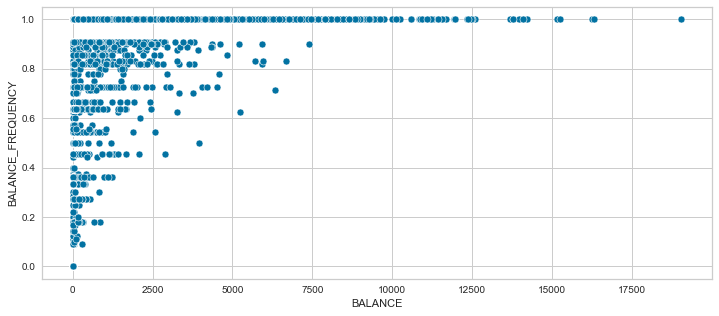

In [163]:
plt.figure(figsize = (12,5))
sns.scatterplot(data=df, x="BALANCE", y="BALANCE_FREQUENCY")

Based on the scatter plot above, of the various kinds of balances owned by user, How frequently the Balance is updated does not determine the balance.

<AxesSubplot:xlabel='INSTALLMENTS_PURCHASES', ylabel='PURCHASES_INSTALLMENTS_FREQUENCY'>

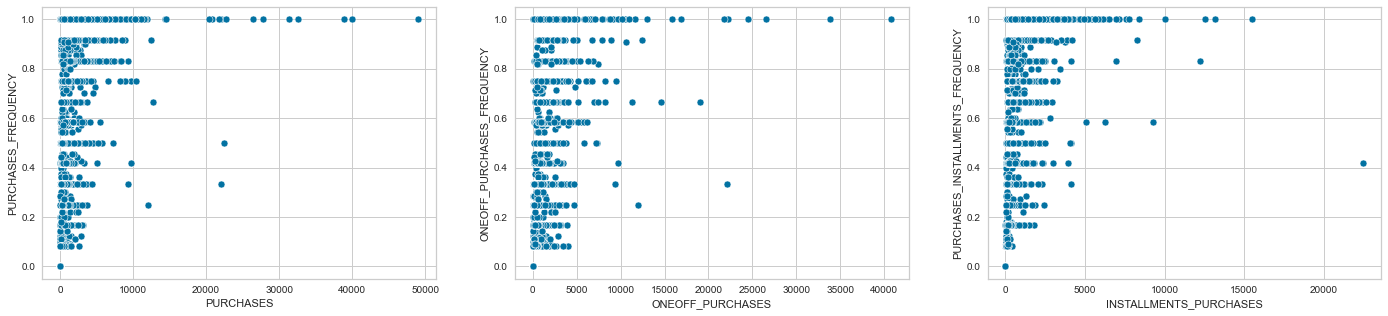

In [164]:
fig, ax =plt.subplots(1,3, figsize = (24,5))
sns.scatterplot(data=df, x="PURCHASES", y="PURCHASES_FREQUENCY", ax=ax[0])
sns.scatterplot(data=df, x="ONEOFF_PURCHASES", y="ONEOFF_PURCHASES_FREQUENCY", ax=ax[1])
sns.scatterplot(data=df, x="INSTALLMENTS_PURCHASES", y="PURCHASES_INSTALLMENTS_FREQUENCY", ax=ax[2])

Likewise with purchases and others. Each of it also unaffected by its frequency. However, purchases, one off purchases, and installment purchases have a positive relationship with each other. The correlation be seen in the heatmap below.

<AxesSubplot:>

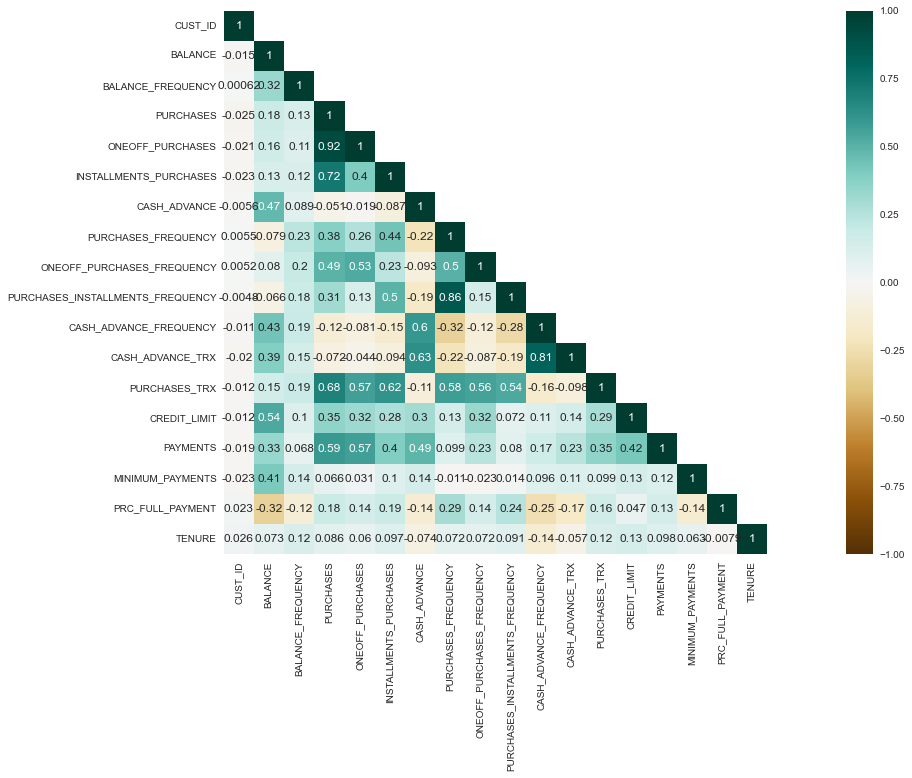

In [165]:
mask = np.triu(df.corr(), 1)
plt.figure(figsize=(28, 10))
sns.heatmap(df.corr(), annot=True, vmax=1, vmin = -1, square=True, cmap='BrBG', mask=mask)

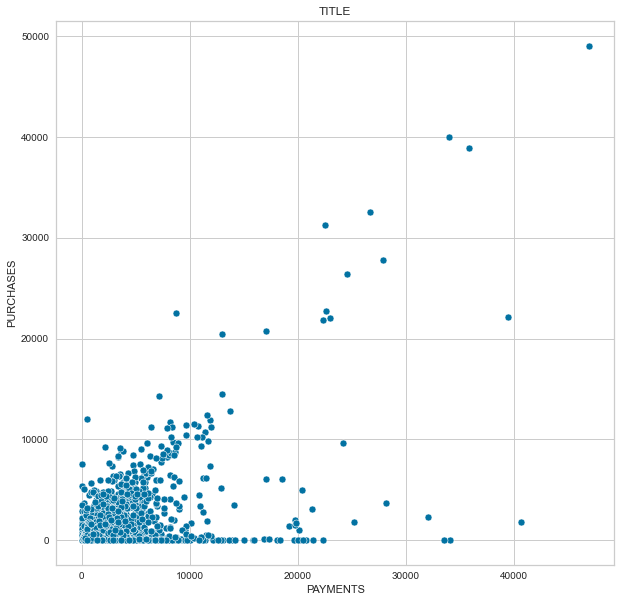

In [166]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='PAYMENTS', y='PURCHASES', data=df)
plt.title('TITLE')
plt.show()

Scatter plot above give illustration that credit limit does not determined by purchases or balanece by user. But :

<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='Count'>

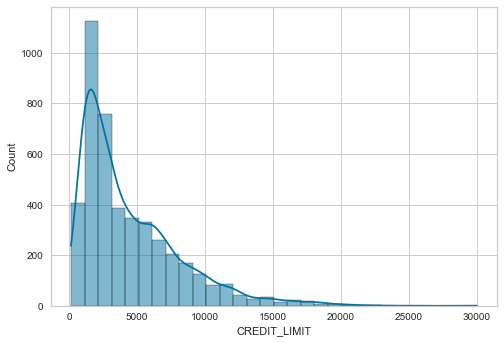

In [167]:
sns.histplot(df['CREDIT_LIMIT'], bins=30, kde=True)

The maximum amount of credit that can be given and/or provided by a particular bank or company to its debtor customers has an average of 4494.45. In general, the bank will determine the credit limit based on the amount of income or monthly salary.

In [168]:
df.head(5)

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0      788    16.581535              0.125      200.0               0.0   
1     1902   943.584041              0.875      103.0             103.0   
2     2322     1.979916              0.125       80.0              80.0   
3     3426   461.455720              1.000      585.0             585.0   
4     3976  1053.594730              1.000     1450.0            1450.0   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   200.0           0.0                0.125   
1                     0.0           0.0                0.125   
2                     0.0           0.0                0.125   
3                     0.0           0.0                0.125   
4                     0.0           0.0                0.125   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000                             0.125   
1                       0.125                             0.000   
2                       0.125                             0.000   
3                       0.125                             0.000   
4                       0.125                             0.000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                     0.0                 0              2        1200.0   
1                     0.0                 0              1        1000.0   
2                     0.0                 0              1        1500.0   
3                     0.0                 0              1        1000.0   
4                     0.0                 0              1        1500.0   

     PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0    0.000000               NaN               0.0       8  
1  215.325023        410.484825               0.0       8  
2    0.000000               NaN               0.0       8  
3  258.032630        151.696433               0.0       8  
4  397.090516        227.143184               0.0       8

<AxesSubplot:xlabel='CASH_ADVANCE', ylabel='Count'>

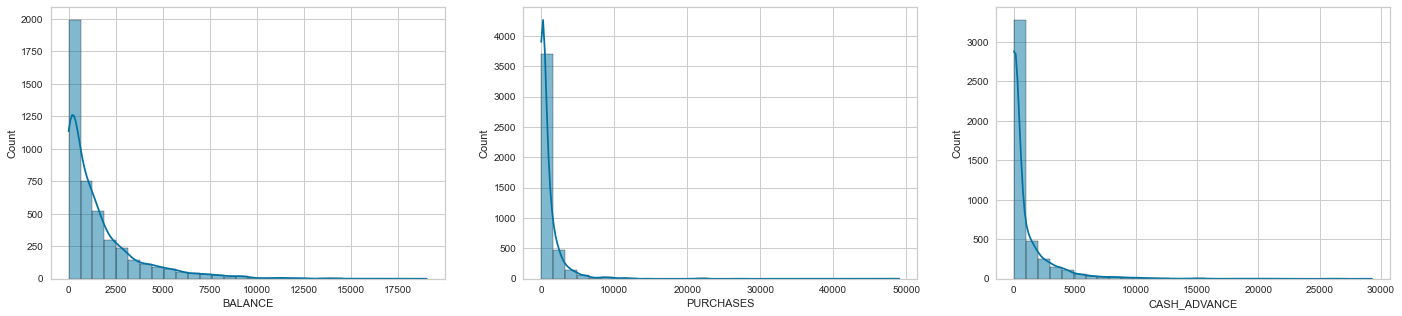

In [169]:
fig, ax =plt.subplots(1,3, figsize = (24,5))
sns.histplot(df['BALANCE'], bins=30, kde=True, ax=ax[0])
sns.histplot(df['PURCHASES'], bins=30, kde=True, ax=ax[1])
sns.histplot(df['CASH_ADVANCE'], bins=30, kde=True, ax=ax[2])

Most of the data obtained are overlapping which means most user own it or have it in less amount.

<AxesSubplot:xlabel='CASH_ADVANCE_FREQUENCY', ylabel='Count'>

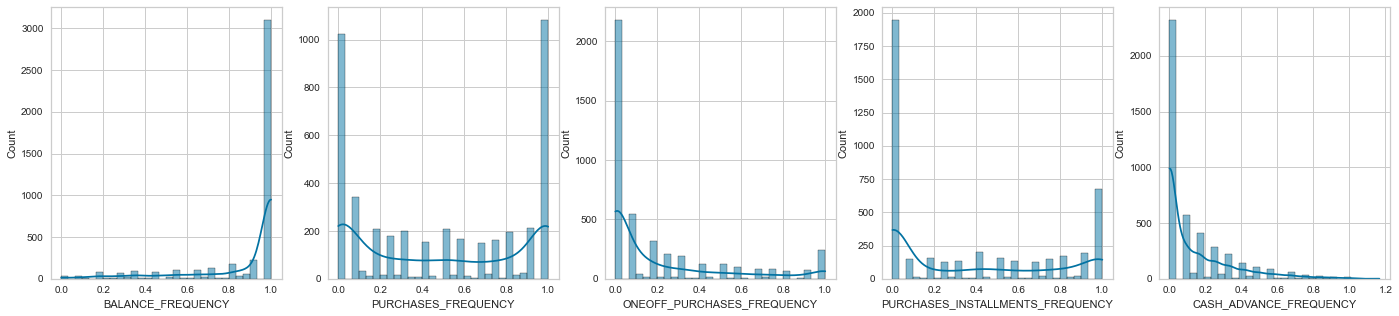

In [170]:
fig, ax =plt.subplots(1,5, figsize = (24,5))
sns.histplot(df['BALANCE_FREQUENCY'], bins=30, kde=True, ax=ax[0])
sns.histplot(df['PURCHASES_FREQUENCY'], bins=30, kde=True, ax=ax[1])
sns.histplot(df['ONEOFF_PURCHASES_FREQUENCY'], bins=30, kde=True, ax=ax[2])
sns.histplot(df['PURCHASES_INSTALLMENTS_FREQUENCY'], bins=30, kde=True, ax=ax[3])
sns.histplot(df['CASH_ADVANCE_FREQUENCY'], bins=30, kde=True, ax=ax[4])

The frequency data is also overlapping, but the balance frequency is updated more often, while the purchase frequency is almost equal. while the rest are not done frequently.

<AxesSubplot:xlabel='TENURE', ylabel='count'>

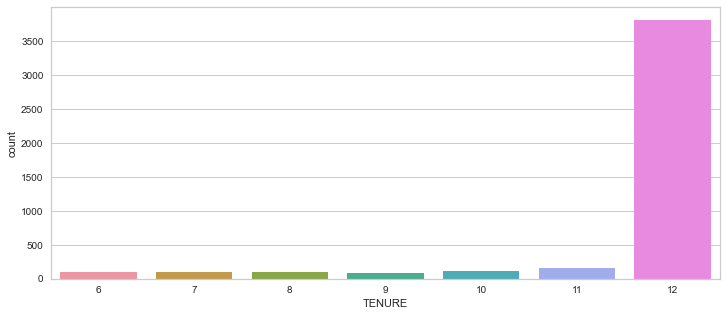

In [171]:
plt.figure(figsize = (12,5))
sns.countplot(x='TENURE', data=df)

In [172]:
pd.DataFrame(df.groupby(['TENURE'])['TENURE'].count())

TENURE
TENURE        
6          103
7          100
8           97
9           88
10         114
11         166
12        3807

In this bank, credit card have certain periode to active. Tenure owned by every user is different, but mostly user agreed that if whithin 12 period the credit card are unusedthen it can be deactivate. Each tenure based on service agreement.

The dataset above is Numerical data which may be a bit difficult to categorize. In fact, it only needs to be done whether there is a correlation between the data.

# 5 - Data Prepocessing

## Get Inference

In [173]:
# Get Data for Model Inference

df_inf = df.sample(10, random_state = 93) #change random state
df_inf

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
330      4512   270.135147           0.909091     958.93            752.90   
3260     6828   258.223705           1.000000    2391.44           1203.18   
2726     8732  1806.895078           1.000000     223.60            223.60   
1994     5272    41.049799           0.727273     413.31            133.31   
1788     6446   204.041606           1.000000    1173.34           1067.70   
1193     8902    25.766006           1.000000     290.00              0.00   
29       1908    13.362018           0.363636     119.46             60.27   
3322     1632  2144.477682           1.000000     228.35            228.35   
4107     8882   458.266310           0.727273     691.82            453.90   
85       6258    15.740657           0.727273      72.00             72.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
330                   206.03      0.000000             0.750000   
3260                 1188.26     49.410478             1.000000   
2726                    0.00    855.065409             0.083333   
1994                  280.00      0.000000             0.583333   
1788                  105.64      0.000000             0.700000   
1193                  290.00      0.000000             1.000000   
29                     59.19      0.000000             0.250000   
3322                    0.00   1908.662268             0.333333   
4107                  237.92    218.676375             0.583333   
85                      0.00      0.000000             0.250000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
330                     0.166667                          0.666667   
3260                    0.666667                          1.000000   
2726                    0.083333                          0.000000   
1994                    0.083333                          0.416667   
1788                    0.700000                          0.300000   
1193                    0.000000                          0.916667   
29                      0.166667                          0.083333   
3322                    0.333333                          0.000000   
4107                    0.166667                          0.416667   
85                      0.250000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
330                 0.000000                 0             26        1900.0   
3260                0.083333                 1             32        5000.0   
2726                0.500000                 8              1        2000.0   
1994                0.000000                 0              8        6000.0   
1788                0.000000                 0             20        5000.0   
1193                0.000000                 0             12        1500.0   
29                  0.000000                 0              4        7500.0   
3322                0.083333                 1              7        4000.0   
4107                0.166667                 3             14        1000.0   
85                  0.000000                 0              5        1000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
330   2063.470552        216.497693          0.000000      12  
3260  2536.830662        210.770458          0.333333      12  
2726  1003.294384        660.657081          0.000000      12  
1994   475.939508        106.476161          0.625000      12  
1788   871.245658        137.913285          0.000000      10  
1193   262.366918        170.710461          1.000000      12  
29     534.740352        132.441551          0.000000      12  
3322  2520.722012        507.937007          0.000000      12  
4107   343.499796        251.998399          0.000000      12  
85      44.098703        205.534260          0.000000      12

In [174]:
# Remove Inference-Set from dataset

df_train_test = df.drop(df_inf.index)
df_train_test

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0         788    16.581535           0.125000     200.00              0.00   
1        1902   943.584041           0.875000     103.00            103.00   
2        2322     1.979916           0.125000      80.00             80.00   
3        3426   461.455720           1.000000     585.00            585.00   
4        3976  1053.594730           1.000000    1450.00           1450.00   
...       ...          ...                ...        ...               ...   
4470     4630  1079.008102           1.000000       0.00              0.00   
4471     8614   809.582978           0.909091       0.00              0.00   
4472     4296  3386.490883           1.000000     560.98            427.22   
4473     4476  4840.545574           1.000000    1595.93           1595.93   
4474     3564  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                     200.00      0.000000             0.125000   
1                       0.00      0.000000             0.125000   
2                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   3819.672466             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   4359.325750             0.454545   
4474                  805.14   4335.919227             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.125000   
1                       0.125000                          0.000000   
2                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1200.0   
1                   0.000000                 0              1        1000.0   
2                   0.000000                 0              1        1500.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                17             25        6000.0   
4474                0.545455                21             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0        0.000000               NaN          0.000000       8  
1      215.325023        410.484825          0.000000       8  
2        0.000000               NaN          0.000000       8  
3      258.032630        151.696433          0.000000       8  
4      397.090516        227.143184          0.000000       8  
...           ...               ...               ...     ...  
4470  1379.635287        2

In [175]:
# Reset Index (Minimalizing error)

df_train_test.reset_index(drop=True, inplace=True)
df_inf.reset_index(drop=True, inplace=True)
df_inf

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     4512   270.135147           0.909091     958.93            752.90   
1     6828   258.223705           1.000000    2391.44           1203.18   
2     8732  1806.895078           1.000000     223.60            223.60   
3     5272    41.049799           0.727273     413.31            133.31   
4     6446   204.041606           1.000000    1173.34           1067.70   
5     8902    25.766006           1.000000     290.00              0.00   
6     1908    13.362018           0.363636     119.46             60.27   
7     1632  2144.477682           1.000000     228.35            228.35   
8     8882   458.266310           0.727273     691.82            453.90   
9     6258    15.740657           0.727273      72.00             72.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  206.03      0.000000             0.750000   
1                 1188.26     49.410478             1.000000   
2                    0.00    855.065409             0.083333   
3                  280.00      0.000000             0.583333   
4                  105.64      0.000000             0.700000   
5                  290.00      0.000000             1.000000   
6                   59.19      0.000000             0.250000   
7                    0.00   1908.662268             0.333333   
8                  237.92    218.676375             0.583333   
9                    0.00      0.000000             0.250000   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.166667                          0.666667   
1                    0.666667                          1.000000   
2                    0.083333                          0.000000   
3                    0.083333                          0.416667   
4                    0.700000                          0.300000   
5                    0.000000                          0.916667   
6                    0.166667                          0.083333   
7                    0.333333                          0.000000   
8                    0.166667                          0.416667   
9                    0.250000                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0             26        1900.0   
1                0.083333                 1             32        5000.0   
2                0.500000                 8              1        2000.0   
3                0.000000                 0              8        6000.0   
4                0.000000                 0             20        5000.0   
5                0.000000                 0             12        1500.0   
6                0.000000                 0              4        7500.0   
7                0.083333                 1              7        4000.0   
8                0.166667                 3             14        1000.0   
9                0.000000                 0              5        1000.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0  2063.470552        216.497693          0.000000      12  
1  2536.830662        210.770458          0.333333      12  
2  1003.294384        660.657081          0.000000      12  
3   475.939508        106.476161          0.625000      12  
4   871.245658        137.913285          0.000000      10  
5   262.366918        170.710461          1.000000      12  
6   534.740352        132.441551          0.000000      12  
7  2520.722012        507.937007          0.000000      12  
8   343.499796        251.998399          0.000000      12  
9    44.098703        205.534260          0.000000      12

## Features Selection

In Unsupervised, feature selection will not be performed. However, because Clustering doesn't really need to be selected for features like supervised, it will only drop unique variables. In the dataset, this unique variable is the Customer ID, so the customer ID will be dropped.

In [176]:
df.drop(['CUST_ID'],axis=1, inplace=True)

## Handling Missing Values

In [177]:
# Checking missing value

df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    158
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Based on previous information, there are several missing values in Credit Limit and Minimum Payment. Later, because there not quite a lot of them, the missing value will be dropped.

In [178]:
# Checking whether the missing values are allowed tro drop

if len(df) * 0.05 > df.isnull().sum().sum():
    print('Allowed to Drop')
else:
    print('Not Allowed to drop')

Allowed to Drop


In [179]:
# Drop Missing Values

df.dropna(inplace=True)

In [180]:
# Rechecking missing value

df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [181]:
data = df.copy()

## Handling Outlier

In this case, every numerical data with outlier will be handled. However, there are some variables such as frequency and tenure that will not be handled. These variables will not be handled because each frequency explains how many related transactions were carried out which are already in the form of scale. As for tenure it explains the period with not many variety of values because tenure in this case is the stipulated period.

<AxesSubplot:title={'center':'PRC_FULL_PAYMENT distribution'}>

/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


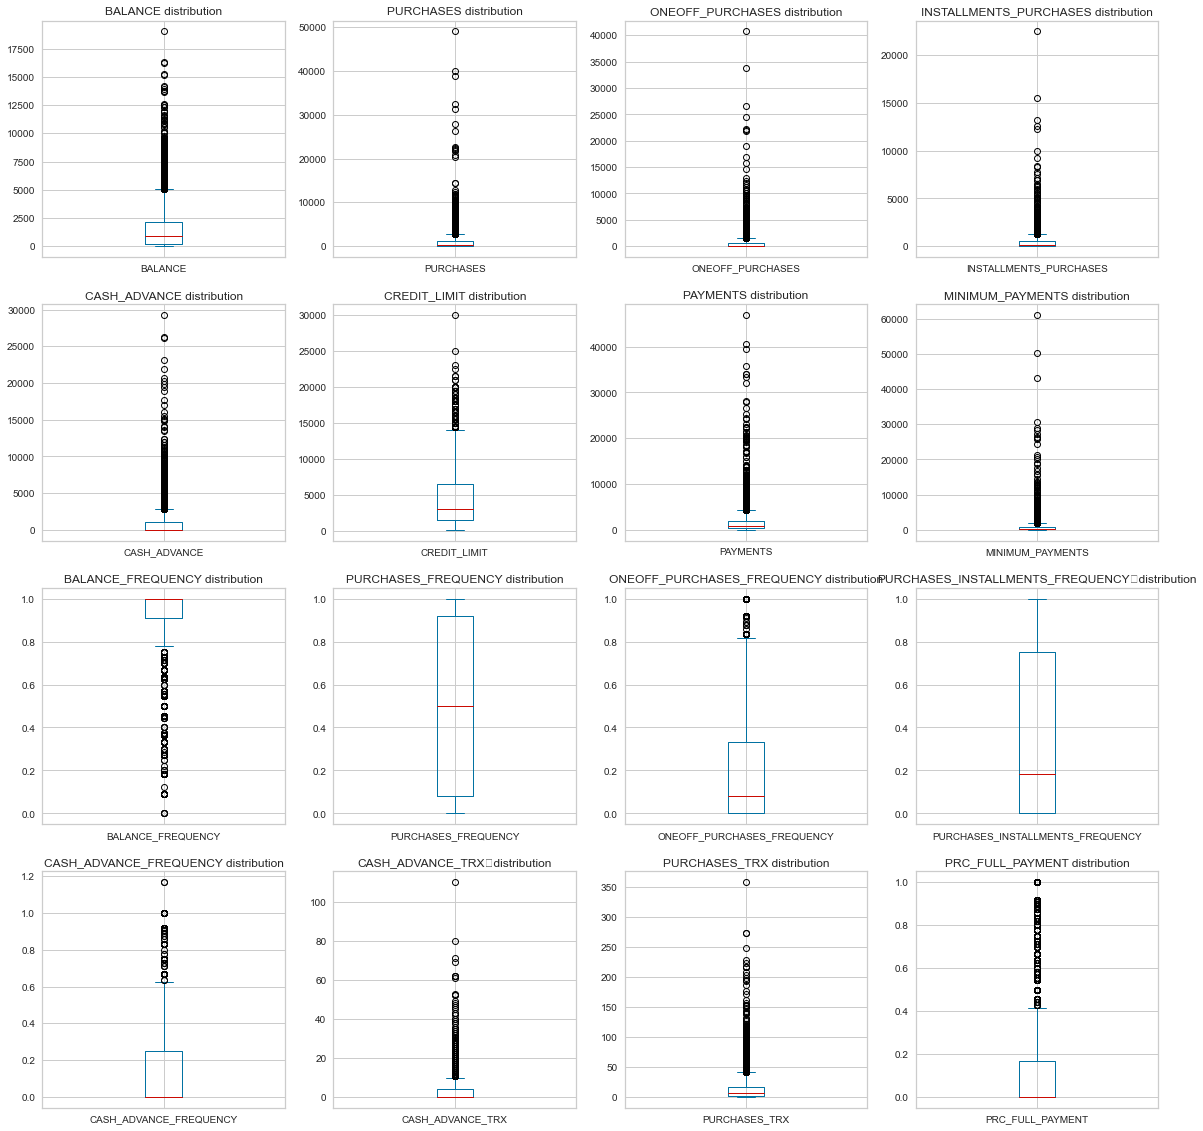

In [182]:
# Showing Boxplot in each Variables

fig, ax =plt.subplots(4,4, figsize = (20,20)) # 5 #12
df['BALANCE'].plot(kind='box', title='BALANCE distribution',ax=ax[0,0])
df['PURCHASES'].plot(kind='box', title='PURCHASES distribution',ax=ax[0,1])
df['ONEOFF_PURCHASES'].plot(kind='box', title='ONEOFF_PURCHASES distribution',ax=ax[0,2])
df['INSTALLMENTS_PURCHASES'].plot(kind='box', title='INSTALLMENTS_PURCHASES distribution',ax=ax[0,3])
df['CASH_ADVANCE'].plot(kind='box', title='CASH_ADVANCE distribution',ax=ax[1,0])
df['CREDIT_LIMIT'].plot(kind='box', title='CREDIT_LIMIT distribution',ax=ax[1,1])
df['PAYMENTS'].plot(kind='box', title='PAYMENTS distribution',ax=ax[1,2])
df['MINIMUM_PAYMENTS'].plot(kind='box', title='MINIMUM_PAYMENTS distribution',ax=ax[1,3])

df['BALANCE_FREQUENCY'].plot(kind='box', title='BALANCE_FREQUENCY distribution',ax=ax[2,0])
df['PURCHASES_FREQUENCY'].plot(kind='box', title='PURCHASES_FREQUENCY distribution',ax=ax[2,1])
df['ONEOFF_PURCHASES_FREQUENCY'].plot(kind='box', title='ONEOFF_PURCHASES_FREQUENCY distribution',ax=ax[2,2])
df['PURCHASES_INSTALLMENTS_FREQUENCY'].plot(kind='box', title='PURCHASES_INSTALLMENTS_FREQUENCY	distribution',ax=ax[2,3])
df['CASH_ADVANCE_FREQUENCY'].plot(kind='box', title='CASH_ADVANCE_FREQUENCY distribution',ax=ax[3,0])
df['CASH_ADVANCE_TRX'].plot(kind='box', title='CASH_ADVANCE_TRX	distribution',ax=ax[3,1])
df['PURCHASES_TRX'].plot(kind='box', title='PURCHASES_TRX distribution',ax=ax[3,2])
df['PRC_FULL_PAYMENT'].plot(kind='box', title='PRC_FULL_PAYMENT distribution',ax=ax[3,3])

From the Boxplot image above, there are many variables that have outliers except for Purchase Frequency and Purchase Installment Frequency. For this reason, outliers in each column that have outliers will be handled with winsorizing.

In [183]:
# Calculating iqr

BALANCE_q3, BALANCE_q1 = np.percentile(df['BALANCE'], [75 ,25])
PURCHASES_q3,PURCHASES_q1 = np.percentile(df['PURCHASES'], [75 ,25])
ONEOFF_PURCHASES_q3, ONEOFF_PURCHASES_q1 = np.percentile(df['ONEOFF_PURCHASES'], [75 ,25])
INSTALLMENTS_PURCHASES_q3, INSTALLMENTS_PURCHASES_q1 = np.percentile(df['INSTALLMENTS_PURCHASES'], [75 ,25])
CASH_ADVANCE_q3, CASH_ADVANCE_q1 = np.percentile(df['CASH_ADVANCE'], [75 ,25])
CREDIT_LIMIT_q3, CREDIT_LIMIT_q1 = np.percentile(df['CREDIT_LIMIT'], [75 ,25])
PAYMENTS_q3, PAYMENTS_q1 = np.percentile(df['PAYMENTS'], [75 ,25])
MINIMUM_PAYMENTS_q3, MINIMUM_PAYMENTS_q1 = np.percentile(df['MINIMUM_PAYMENTS'], [75 ,25])

BALANCE_FREQUENCY_q3, BALANCE_FREQUENCY_q1 = np.percentile(df['BALANCE_FREQUENCY'], [75 ,25])
PURCHASES_FREQUENCY_q3,PURCHASES_FREQUENCY_q1 = np.percentile(df['PURCHASES_FREQUENCY'], [75 ,25])
ONEOFF_PURCHASES_FREQUENCY_q3, ONEOFF_PURCHASES_FREQUENCY_q1 = np.percentile(df['ONEOFF_PURCHASES_FREQUENCY'], [75 ,25])
PURCHASES_INSTALLMENTS_FREQUENCY_q3, PURCHASES_INSTALLMENTS_FREQUENCY_q1 = np.percentile(df['PURCHASES_INSTALLMENTS_FREQUENCY'], [75 ,25])
CASH_ADVANCE_FREQUENCY_q3, CASH_ADVANCE_FREQUENCY_q1 = np.percentile(df['CASH_ADVANCE_FREQUENCY'], [75 ,25])
CASH_ADVANCE_TRX_q3, CASH_ADVANCE_TRX_q1 = np.percentile(df['CASH_ADVANCE_TRX'], [75 ,25])
PURCHASES_TRX_q3, PURCHASES_TRX_q1 = np.percentile(df['PURCHASES_TRX'], [75 ,25])
PRC_FULL_PAYMENT_q3, PRC_FULL_PAYMENT_q1 = np.percentile(df['PRC_FULL_PAYMENT'], [75 ,25])




BALANCE_iqr = BALANCE_q3 - BALANCE_q1
PURCHASES_iqr = PURCHASES_q3 - PURCHASES_q1
ONEOFF_PURCHASES_iqr = ONEOFF_PURCHASES_q3 - ONEOFF_PURCHASES_q1
INSTALLMENTS_PURCHASES_iqr = INSTALLMENTS_PURCHASES_q3 - INSTALLMENTS_PURCHASES_q1
CASH_ADVANCE_iqr = CASH_ADVANCE_q3 - CASH_ADVANCE_q1
CREDIT_LIMIT_iqr = CREDIT_LIMIT_q3 - CREDIT_LIMIT_q1
PAYMENTS_iqr = PAYMENTS_q3 - PAYMENTS_q1
MINIMUM_PAYMENTS_iqr = MINIMUM_PAYMENTS_q3 - MINIMUM_PAYMENTS_q1

BALANCE_FREQUENCY_iqr = BALANCE_FREQUENCY_q3 - BALANCE_FREQUENCY_q1
# PURCHASES_FREQUENCY_iqr = PURCHASES_FREQUENCY_q3 - PURCHASES_FREQUENCY_q1
ONEOFF_PURCHASES_FREQUENCY_iqr = ONEOFF_PURCHASES_FREQUENCY_q3 - ONEOFF_PURCHASES_FREQUENCY_q1
# PURCHASES_INSTALLMENTS_FREQUENCY_iqr = PURCHASES_INSTALLMENTS_FREQUENCY_q3 - PURCHASES_INSTALLMENTS_FREQUENCY_q1
CASH_ADVANCE_FREQUENCY_iqr = CASH_ADVANCE_FREQUENCY_q3 - CASH_ADVANCE_FREQUENCY_q1
CASH_ADVANCE_TRX_iqr = CASH_ADVANCE_TRX_q3 - CASH_ADVANCE_TRX_q1
PURCHASES_TRX_iqr = PURCHASES_TRX_q3 - PURCHASES_TRX_q1
PRC_FULL_PAYMENT_iqr = PRC_FULL_PAYMENT_q3 - PRC_FULL_PAYMENT_q1



max_BALANCE_iqr = BALANCE_q3 + 1.5 * BALANCE_iqr
max_PURCHASES_iqr = PURCHASES_q3 + 1.5 * PURCHASES_iqr
max_ONEOFF_PURCHASES_iqr = ONEOFF_PURCHASES_q3 + 1.5 * ONEOFF_PURCHASES_iqr
max_INSTALLMENTS_PURCHASES_iqr = INSTALLMENTS_PURCHASES_q3 + 1.5 * INSTALLMENTS_PURCHASES_iqr
max_CASH_ADVANCE_iqr = CASH_ADVANCE_q3 + 1.5 * CASH_ADVANCE_iqr
max_CREDIT_LIMIT_iqr = CREDIT_LIMIT_q3 + 1.5 * CREDIT_LIMIT_iqr
max_PAYMENTS_iqr = PAYMENTS_q3 + 1.5 * PAYMENTS_iqr
max_MINIMUM_PAYMENTS_iqr = MINIMUM_PAYMENTS_q3 + 1.5 * MINIMUM_PAYMENTS_iqr

min_BALANCE_FREQUENCY_iqr = BALANCE_FREQUENCY_q1 - 1.5 * BALANCE_FREQUENCY_iqr
# max_PURCHASES_FREQUENCY_iqr = PURCHASES_FREQUENCY_q3 + 1.5 * PURCHASES_FREQUENCY_iqr
max_ONEOFF_PURCHASES_FREQUENCY_iqr = ONEOFF_PURCHASES_FREQUENCY_q3 + 1.5 * ONEOFF_PURCHASES_FREQUENCY_iqr
# max_PURCHASES_INSTALLMENTS_FREQUENCY_iqr = PURCHASES_INSTALLMENTS_FREQUENCY_q3 + 1.5 * PURCHASES_INSTALLMENTS_FREQUENCY_iqr
max_CASH_ADVANCE_FREQUENCY_iqr = CASH_ADVANCE_FREQUENCY_q3 + 1.5 * CASH_ADVANCE_FREQUENCY_iqr
max_CASH_ADVANCE_TRX_iqr = CASH_ADVANCE_TRX_q3 + 1.5 * CASH_ADVANCE_TRX_iqr
max_PURCHASES_TRX_iqr = PURCHASES_TRX_q3 + 1.5 * PURCHASES_TRX_iqr
max_PRC_FULL_PAYMENT_iqr = PRC_FULL_PAYMENT_q3 + 1.5 * PRC_FULL_PAYMENT_iqr



print('BALANCE max IQR = ', max_BALANCE_iqr)
print('PURCHASES max IQR = ', max_PURCHASES_iqr)
print('ONEOFF_PURCHASES max IQR = ', max_ONEOFF_PURCHASES_iqr)
print('INSTALLMENTS_PURCHASES max IQR = ', max_INSTALLMENTS_PURCHASES_iqr)
print('CASH_ADVANCE max IQR = ', max_CASH_ADVANCE_iqr)
print('CREDIT_LIMIT max IQR = ', max_CREDIT_LIMIT_iqr)
print('PAYMENTS max IQR = ', max_PAYMENTS_iqr)
print('MINIMUM_PAYMENTS max IQR = ', max_MINIMUM_PAYMENTS_iqr)

print('BALANCE_FREQUENCY min IQR = ', min_BALANCE_FREQUENCY_iqr)
# print('PURCHASES_FREQUENCY max IQR = ', max_PURCHASES_FREQUENCY_iqr)
print('ONEOFF_PURCHASES_FREQUENCY max IQR = ', max_ONEOFF_PURCHASES_FREQUENCY_iqr)
# print('PURCHASES_INSTALLMENTS_FREQUENCY max IQR = ', max_PURCHASES_INSTALLMENTS_FREQUENCY_iqr)
print('CASH_ADVANCE_FREQUENCY max IQR = ', max_CASH_ADVANCE_FREQUENCY_iqr)
print('CASH_ADVANCE_TRX max IQR = ', max_CASH_ADVANCE_TRX_iqr)
print('PURCHASES_TRX max IQR = ', max_PURCHASES_TRX_iqr)
print('PRC_FULL_PAYMENT max IQR = ', max_PRC_FULL_PAYMENT_iqr)



# Replace the Value with Upper Boundaries

winso_BALANCE = df['BALANCE'].copy() 
winso_PURCHASES = df['PURCHASES'].copy()
winso_ONEOFF_PURCHASES = df['ONEOFF_PURCHASES'].copy() 
winso_INSTALLMENTS_PURCHASES = df['INSTALLMENTS_PURCHASES'].copy() 
winso_CASH_ADVANCE = df['CASH_ADVANCE'].copy() 
winso_CREDIT_LIMIT = df['CREDIT_LIMIT'].copy() 
winso_PAYMENTS = df['PAYMENTS'].copy() 
winso_MINIMUM_PAYMENTS = df['MINIMUM_PAYMENTS'].copy() 

winso_BALANCE_FREQUENCY = df['BALANCE_FREQUENCY'].copy() 
winso_PURCHASES_FREQUENCY = df['PURCHASES_FREQUENCY'].copy()
winso_ONEOFF_PURCHASES_FREQUENCY = df['ONEOFF_PURCHASES_FREQUENCY'].copy() 
winso_PURCHASES_INSTALLMENTS_FREQUENCY = df['PURCHASES_INSTALLMENTS_FREQUENCY'].copy() 
winso_CASH_ADVANCE_FREQUENCY = df['CASH_ADVANCE_FREQUENCY'].copy() 
winso_CASH_ADVANCE_TRX = df['CASH_ADVANCE_TRX'].copy() 
winso_PURCHASES_TRX = df['PURCHASES_TRX'].copy() 
winso_PRC_FULL_PAYMENT= df['PRC_FULL_PAYMENT'].copy() 


winso_BALANCE.loc[winso_BALANCE> max_BALANCE_iqr] = max_BALANCE_iqr
winso_PURCHASES.loc[winso_PURCHASES > max_PURCHASES_iqr] = max_PURCHASES_iqr
winso_ONEOFF_PURCHASES.loc[winso_ONEOFF_PURCHASES> max_ONEOFF_PURCHASES_iqr] = max_ONEOFF_PURCHASES_iqr
winso_INSTALLMENTS_PURCHASES.loc[winso_INSTALLMENTS_PURCHASES > max_INSTALLMENTS_PURCHASES_iqr] = max_INSTALLMENTS_PURCHASES_iqr
winso_CASH_ADVANCE.loc[winso_CASH_ADVANCE> max_CASH_ADVANCE_iqr] = max_CASH_ADVANCE_iqr
winso_CREDIT_LIMIT.loc[winso_CREDIT_LIMIT > max_CREDIT_LIMIT_iqr] = max_CREDIT_LIMIT_iqr
winso_PAYMENTS.loc[winso_PAYMENTS> max_PAYMENTS_iqr] = max_PAYMENTS_iqr
winso_MINIMUM_PAYMENTS.loc[winso_MINIMUM_PAYMENTS > max_MINIMUM_PAYMENTS_iqr] = max_MINIMUM_PAYMENTS_iqr

winso_BALANCE_FREQUENCY.loc[winso_BALANCE_FREQUENCY< min_BALANCE_FREQUENCY_iqr] = min_BALANCE_FREQUENCY_iqr
# winso_PURCHASES_FREQUENCY.loc[winso_PURCHASES_FREQUENCY > max_PURCHASES_FREQUENCY_iqr] = max_PURCHASES_FREQUENCY_iqr
winso_ONEOFF_PURCHASES_FREQUENCY.loc[winso_ONEOFF_PURCHASES_FREQUENCY> max_ONEOFF_PURCHASES_FREQUENCY_iqr] = max_ONEOFF_PURCHASES_FREQUENCY_iqr
# winso_PURCHASES_INSTALLMENTS_FREQUENCY.loc[winso_PURCHASES_INSTALLMENTS_FREQUENCY > max_PURCHASES_INSTALLMENTS_FREQUENCY_iqr] = max_PURCHASES_INSTALLMENTS_FREQUENCY_iqr
winso_CASH_ADVANCE_FREQUENCY.loc[winso_CASH_ADVANCE_FREQUENCY> max_CASH_ADVANCE_FREQUENCY_iqr] = max_CASH_ADVANCE_FREQUENCY_iqr
winso_CASH_ADVANCE_TRX.loc[winso_CASH_ADVANCE_TRX > max_CASH_ADVANCE_TRX_iqr] = max_CASH_ADVANCE_TRX_iqr
winso_PURCHASES_TRX.loc[winso_PURCHASES_TRX> max_PURCHASES_TRX_iqr] = max_PURCHASES_TRX_iqr
winso_PRC_FULL_PAYMENT.loc[winso_PRC_FULL_PAYMENT> max_PRC_FULL_PAYMENT_iqr] = max_PRC_FULL_PAYMENT_iqr

BALANCE max IQR =  5051.801722125
PURCHASES max IQR =  2807.8562500000003
ONEOFF_PURCHASES max IQR =  1500.0
INSTALLMENTS_PURCHASES max IQR =  1246.48125
CASH_ADVANCE max IQR =  2775.6213156249996
CREDIT_LIMIT max IQR =  14000.0
PAYMENTS max IQR =  4245.361617250001
MINIMUM_PAYMENTS max IQR =  1821.8241228749998
BALANCE_FREQUENCY min IQR =  0.7727275
ONEOFF_PURCHASES_FREQUENCY max IQR =  0.8333325
CASH_ADVANCE_FREQUENCY max IQR =  0.625
CASH_ADVANCE_TRX max IQR =  10.0
PURCHASES_TRX max IQR =  41.0
PRC_FULL_PAYMENT max IQR =  0.4166675


In [184]:

# Checking the previous max
print('\nBALANCE max after winsorizing = ',winso_BALANCE.max())
print('BALANCE max before winsorizing = ', df['BALANCE'].max())
print('\nPURCHASES max after winsorizing = ',winso_PURCHASES.max())
print('PURCHASES max before winsorizing = ', df['PURCHASES'].max())
print('\nONEOFF_PURCHASES max after winsorizing = ',winso_ONEOFF_PURCHASES.max())
print('ONEOFF_PURCHASES max before winsorizing = ', df['ONEOFF_PURCHASES'].max())
print('\nINSTALLMENTS_PURCHASES max after winsorizing = ',winso_INSTALLMENTS_PURCHASES.max())
print('INSTALLMENTS_PURCHASES max before winsorizing = ', df['INSTALLMENTS_PURCHASES'].max())
print('\nCASH_ADVANCE max after winsorizing = ',winso_CASH_ADVANCE.max())
print('CASH_ADVANCE max before winsorizing = ', df['CASH_ADVANCE'].max())
print('\nCREDIT_LIMIT max after winsorizing = ',winso_CREDIT_LIMIT.max())
print('CREDIT_LIMIT max before winsorizing = ', df['CREDIT_LIMIT'].max())
print('\nPAYMENTS max after winsorizing = ',winso_PAYMENTS.max())
print('PAYMENTS max before winsorizing = ', df['PAYMENTS'].max())
print('\nMINIMUM_PAYMENTS max after winsorizing = ',winso_MINIMUM_PAYMENTS.max())
print('MINIMUM_PAYMENTS max before winsorizing = ', df['MINIMUM_PAYMENTS'].max())

print('\nBALANCE_FREQUENCY min after winsorizing = ',winso_BALANCE_FREQUENCY.min())
print('BALANCE_FREQUENCY min before winsorizing = ', df['BALANCE_FREQUENCY'].min())
# print('\nPURCHASES_FREQUENCY max after winsorizing = ',winso_PURCHASES_FREQUENCY.max())
# print('PURCHASES_FREQUENCY max before winsorizing = ', df['PURCHASES_FREQUENCY'].max())
print('\nONEOFF_PURCHASES_FREQUENCY max after winsorizing = ',winso_ONEOFF_PURCHASES_FREQUENCY.max())
print('ONEOFF_PURCHASES_FREQUENCY max before winsorizing = ', df['ONEOFF_PURCHASES_FREQUENCY'].max())
# print('\nPURCHASES_INSTALLMENTS_FREQUENCY max after winsorizing = ',winso_PURCHASES_INSTALLMENTS_FREQUENCY.max())
# print('PURCHASES_INSTALLMENTS_FREQUENCY max before winsorizing = ', df['PURCHASES_INSTALLMENTS_FREQUENCY'].max())
print('\nCASH_ADVANCE_FREQUENCY max after winsorizing = ',winso_CASH_ADVANCE_FREQUENCY.max())
print('CASH_ADVANCE_FREQUENCY max before winsorizing = ', df['CASH_ADVANCE_FREQUENCY'].max())
print('\nCASH_ADVANCE_TRX max after winsorizing = ',winso_CASH_ADVANCE_TRX.max())
print('CASH_ADVANCE_TRX max before winsorizing = ', df['CASH_ADVANCE_TRX'].max())
print('\nPURCHASES_TRX max after winsorizing = ',winso_PURCHASES_TRX.max())
print('PURCHASES_TRX max before winsorizing = ', df['PURCHASES_TRX'].max())
print('\nPRC_FULL_PAYMENTmax after winsorizing = ',winso_PRC_FULL_PAYMENT.max())
print('PRC_FULL_PAYMENTmax before winsorizing = ', df['PRC_FULL_PAYMENT'].max())


BALANCE max after winsorizing =  5051.801722125
BALANCE max before winsorizing =  19043.13856

PURCHASES max after winsorizing =  2807.8562500000003
PURCHASES max before winsorizing =  49039.57

ONEOFF_PURCHASES max after winsorizing =  1500.0
ONEOFF_PURCHASES max before winsorizing =  40761.25

INSTALLMENTS_PURCHASES max after winsorizing =  1246.48125
INSTALLMENTS_PURCHASES max before winsorizing =  22500.0

CASH_ADVANCE max after winsorizing =  2775.6213156249996
CASH_ADVANCE max before winsorizing =  29282.10915

CREDIT_LIMIT max after winsorizing =  14000.0
CREDIT_LIMIT max before winsorizing =  30000.0

PAYMENTS max after winsorizing =  4245.361617250001
PAYMENTS max before winsorizing =  46930.59824

MINIMUM_PAYMENTS max after winsorizing =  1821.8241228749998
MINIMUM_PAYMENTS max before winsorizing =  61031.6186

BALANCE_FREQUENCY min after winsorizing =  0.7727275
BALANCE_FREQUENCY min before winsorizing =  0.0

ONEOFF_PURCHASES_FREQUENCY max after winsorizing =  0.8333325
ON

In [185]:
# Replace the current values

df['BALANCE'] = winso_BALANCE
df['PURCHASES'] = winso_PURCHASES
df['ONEOFF_PURCHASES'] = winso_ONEOFF_PURCHASES
df['INSTALLMENTS_PURCHASES'] = winso_INSTALLMENTS_PURCHASES
df['CASH_ADVANCE'] = winso_CASH_ADVANCE
df['CREDIT_LIMIT'] = winso_CREDIT_LIMIT
df['PAYMENTS'] = winso_PAYMENTS
df['MINIMUM_PAYMENTS'] = winso_MINIMUM_PAYMENTS

df['BALANCE_FREQUENCY'] = winso_BALANCE_FREQUENCY
df['ONEOFF_PURCHASES_FREQUENCY'] = winso_ONEOFF_PURCHASES_FREQUENCY
df['CASH_ADVANCE_FREQUENCY'] = winso_CASH_ADVANCE_FREQUENCY
df['CASH_ADVANCE_TRX'] = winso_CASH_ADVANCE_TRX
df['PURCHASES_TRX'] = winso_PURCHASES_TRX
df['PRC_FULL_PAYMENT'] = winso_PRC_FULL_PAYMENT

<AxesSubplot:title={'center':'PRC_FULL_PAYMENT distribution'}>

/Users/shafiralaksitasari/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


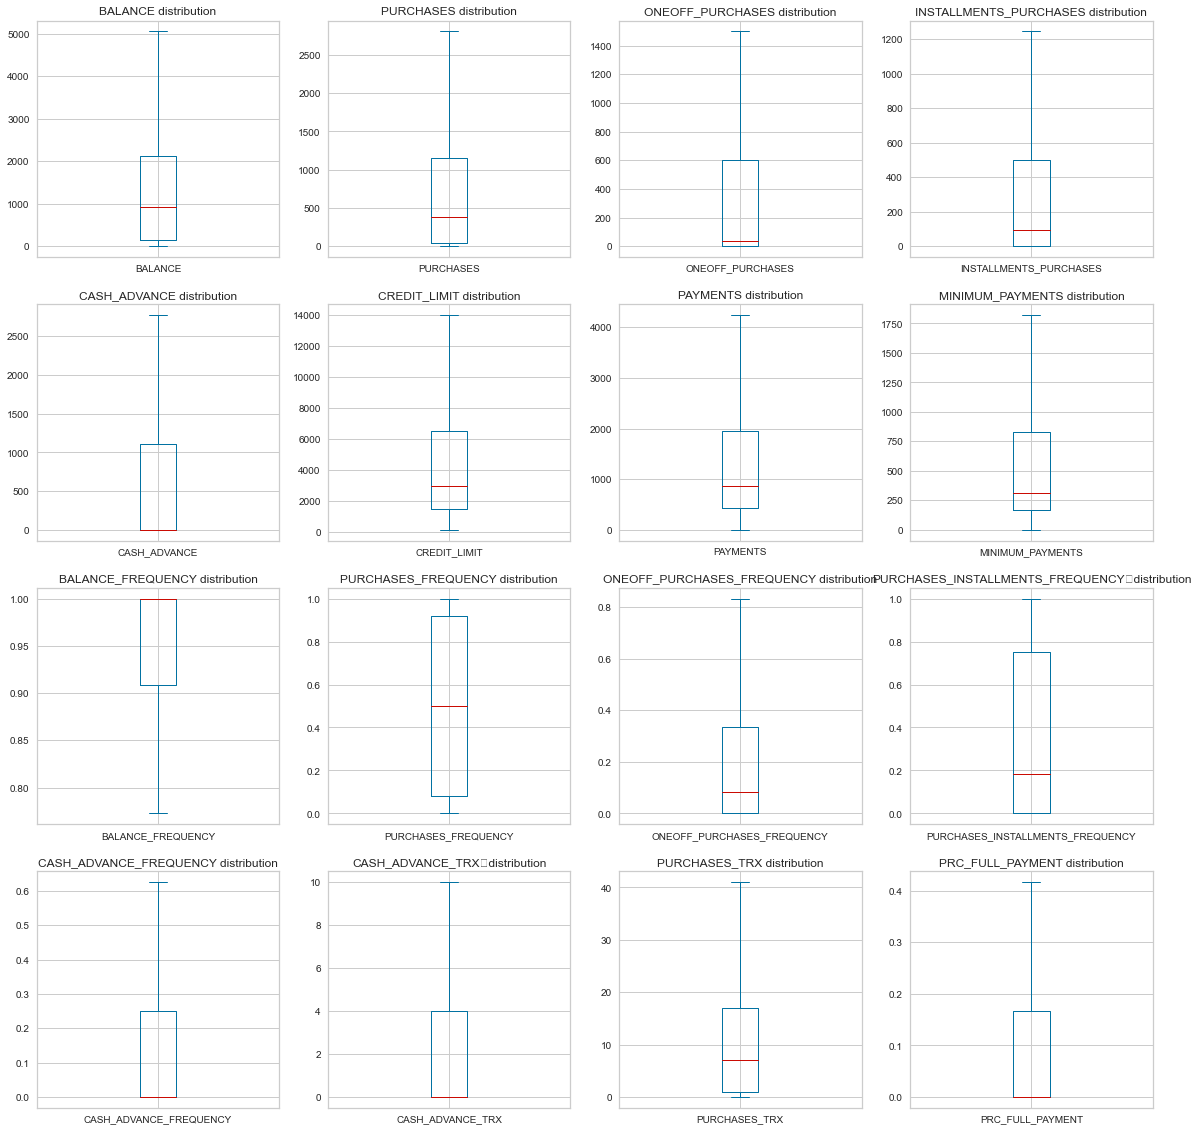

In [186]:
# Showing Boxplot in each Variables after Winsorizing

fig, ax =plt.subplots(4,4, figsize = (20,20)) # 5 #12
df['BALANCE'].plot(kind='box', title='BALANCE distribution',ax=ax[0,0])
df['PURCHASES'].plot(kind='box', title='PURCHASES distribution',ax=ax[0,1])
df['ONEOFF_PURCHASES'].plot(kind='box', title='ONEOFF_PURCHASES distribution',ax=ax[0,2])
df['INSTALLMENTS_PURCHASES'].plot(kind='box', title='INSTALLMENTS_PURCHASES distribution',ax=ax[0,3])
df['CASH_ADVANCE'].plot(kind='box', title='CASH_ADVANCE distribution',ax=ax[1,0])
df['CREDIT_LIMIT'].plot(kind='box', title='CREDIT_LIMIT distribution',ax=ax[1,1])
df['PAYMENTS'].plot(kind='box', title='PAYMENTS distribution',ax=ax[1,2])
df['MINIMUM_PAYMENTS'].plot(kind='box', title='MINIMUM_PAYMENTS distribution',ax=ax[1,3])

df['BALANCE_FREQUENCY'].plot(kind='box', title='BALANCE_FREQUENCY distribution',ax=ax[2,0])
df['PURCHASES_FREQUENCY'].plot(kind='box', title='PURCHASES_FREQUENCY distribution',ax=ax[2,1])
df['ONEOFF_PURCHASES_FREQUENCY'].plot(kind='box', title='ONEOFF_PURCHASES_FREQUENCY distribution',ax=ax[2,2])
df['PURCHASES_INSTALLMENTS_FREQUENCY'].plot(kind='box', title='PURCHASES_INSTALLMENTS_FREQUENCY	distribution',ax=ax[2,3])
df['CASH_ADVANCE_FREQUENCY'].plot(kind='box', title='CASH_ADVANCE_FREQUENCY distribution',ax=ax[3,0])
df['CASH_ADVANCE_TRX'].plot(kind='box', title='CASH_ADVANCE_TRX	distribution',ax=ax[3,1])
df['PURCHASES_TRX'].plot(kind='box', title='PURCHASES_TRX distribution',ax=ax[3,2])
df['PRC_FULL_PAYMENT'].plot(kind='box', title='PRC_FULL_PAYMENT distribution',ax=ax[3,3])

## Feature Scaling

There is no need to encode any columns because these clustering method is only for numerical data only. Also, no need to scale any frequency variables because each frequency result are between 0-1 so the frequency already been scaled.

In [187]:
# Split numerical and categorical based on dt types

scale_columns = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']
unscale_columns = df.loc[:, ~df.columns.isin(scale_columns)].columns.tolist()

print('Scale Later Numerical Columns : ', scale_columns)
print('Unscale Later Numerical Columns: ', unscale_columns)

# Split Column Types

df_scale = df[scale_columns]
df_unscale = df[unscale_columns]

Scale Later Numerical Columns :  ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']
Unscale Later Numerical Columns:  ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY']


0           1                 2   \
features          BALANCE   PURCHASES  ONEOFF_PURCHASES   
Skew             1.169755    1.200665          1.230764   
Standard Dev  1552.298895  900.428473         528.32413   

                                  3             4             5            6   \
features      INSTALLMENTS_PURCHASES  CASH_ADVANCE  CREDIT_LIMIT     PAYMENTS   
Skew                         1.22431      1.260175      1.101972     1.144825   
Standard Dev              418.013267      990.3095   3424.848862  1277.080759   

                            7                  8                    9   \
features      MINIMUM_PAYMENTS  BALANCE_FREQUENCY  PURCHASES_FREQUENCY   
Skew                  1.196233          -1.175883             0.035642   
Standard Dev        556.021588             0.0908             0.399564   

                                      10                                11  \
features      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY   
Skew                            1.313074                          0.486577   
Standard Dev                    0.273709                          0.398217   

                                  12                13             14  \
features      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX   
Skew                        1.383849          1.262859       1.115996   
Standard Dev                0.181696          3.434549      13.020452   

                            15  
features      PRC_FULL_PAYMENT  
Skew                  1.217128  
Standard Dev          0.160012

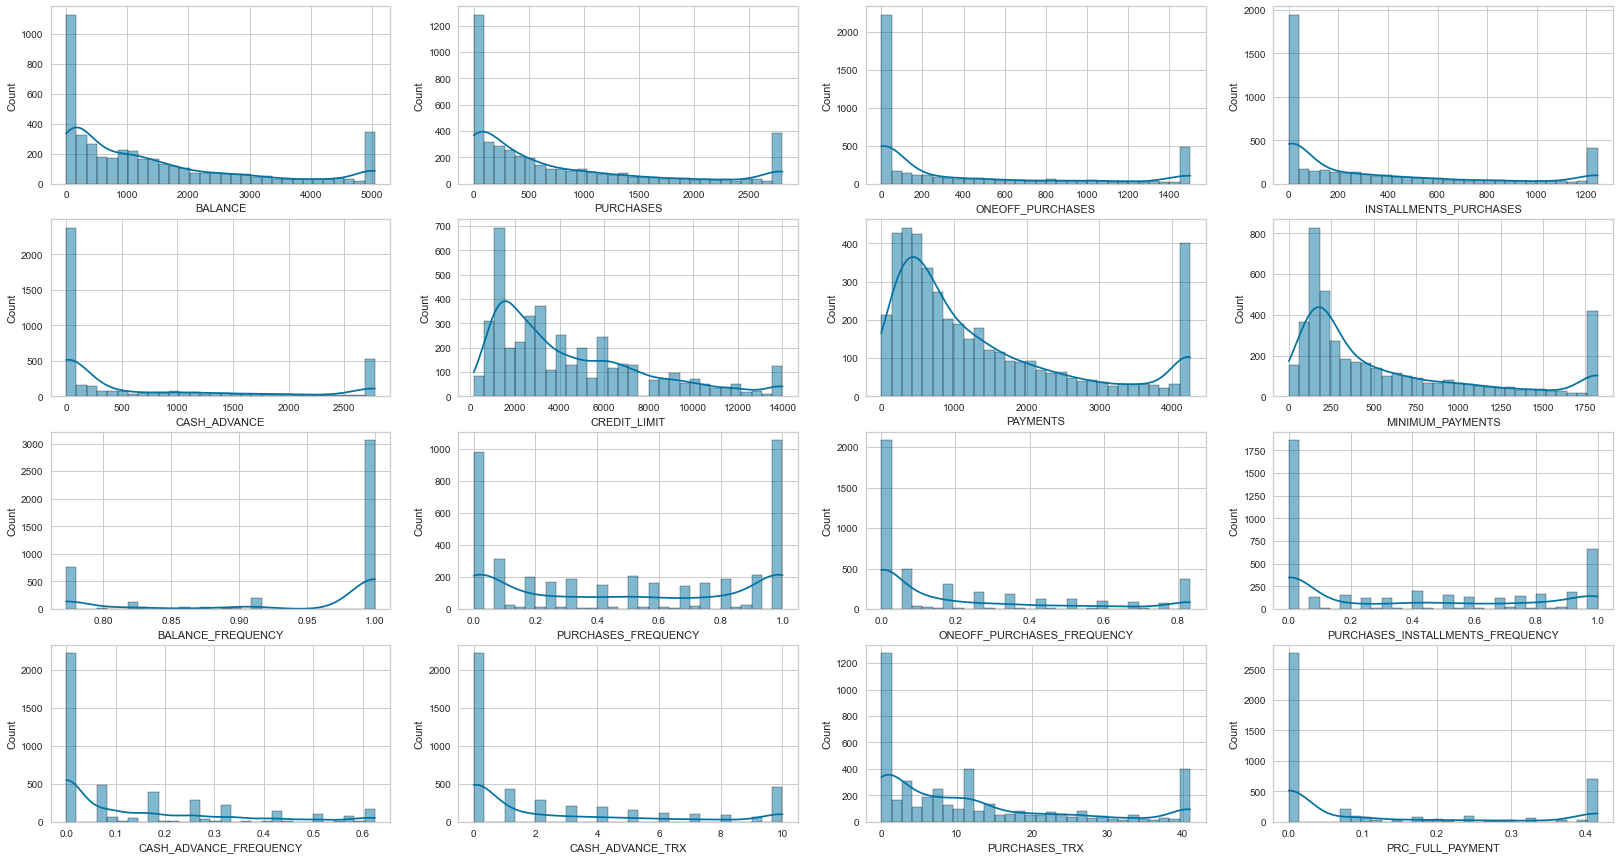

In [188]:
# Display Numerical Histo Plotand Skewness
fig, ax =plt.subplots(4,4, figsize = (28,15))
sns.histplot(df['BALANCE'], bins=30, kde=True, ax=ax[0,0])
sns.histplot(df['PURCHASES'], bins=30, kde=True, ax=ax[0,1])
sns.histplot(df['ONEOFF_PURCHASES'], bins=30, kde=True, ax=ax[0,2])
sns.histplot(df['INSTALLMENTS_PURCHASES'], bins=30, kde=True, ax=ax[0,3])
sns.histplot(df['CASH_ADVANCE'], bins=30, kde=True, ax=ax[1,0])
sns.histplot(df['CREDIT_LIMIT'], bins=30, kde=True, ax=ax[1,1])
sns.histplot(df['PAYMENTS'], bins=30, kde=True, ax=ax[1,2])
sns.histplot(df['MINIMUM_PAYMENTS'], bins=30, kde=True, ax=ax[1,3])

sns.histplot(df['BALANCE_FREQUENCY'], bins=30, kde=True, ax=ax[2,0])
sns.histplot(df['PURCHASES_FREQUENCY'], bins=30, kde=True, ax=ax[2,1])
sns.histplot(df['ONEOFF_PURCHASES_FREQUENCY'], bins=30, kde=True, ax=ax[2,2])
sns.histplot(df['PURCHASES_INSTALLMENTS_FREQUENCY'], bins=30, kde=True, ax=ax[2,3])
sns.histplot(df['CASH_ADVANCE_FREQUENCY'], bins=30, kde=True, ax=ax[3,0])
sns.histplot(df['CASH_ADVANCE_TRX'], bins=30, kde=True, ax=ax[3,1])
sns.histplot(df['PURCHASES_TRX'], bins=30, kde=True, ax=ax[3,2])
sns.histplot(df['PRC_FULL_PAYMENT'], bins=30, kde=True, ax=ax[3,3])


data_skewness = pd.DataFrame(columns=["features", "Skew", "Standard Dev"], 
                                data=[['BALANCE',df['BALANCE'].skew(),df['BALANCE'].std()],
                                    ['PURCHASES',df['PURCHASES'].skew(),df['PURCHASES'].std()],
                                    ['ONEOFF_PURCHASES', df['ONEOFF_PURCHASES'].skew(), df['ONEOFF_PURCHASES'].std()],
                                    ['INSTALLMENTS_PURCHASES', df['INSTALLMENTS_PURCHASES'].skew(), df['INSTALLMENTS_PURCHASES'].std()],
                                    ['CASH_ADVANCE',df['CASH_ADVANCE'].skew(),df['CASH_ADVANCE'].std()],
                                    ['CREDIT_LIMIT',df['CREDIT_LIMIT'].skew(),df['CREDIT_LIMIT'].std()],
                                    ['PAYMENTS',df['PAYMENTS'].skew(),df['PAYMENTS'].std()],
                                    ['MINIMUM_PAYMENTS',df['MINIMUM_PAYMENTS'].skew(),df['MINIMUM_PAYMENTS'].std()],
                                    ['BALANCE_FREQUENCY',df['BALANCE_FREQUENCY'].skew(),df['BALANCE_FREQUENCY'].std()],
                                    ['PURCHASES_FREQUENCY',df['PURCHASES_FREQUENCY'].skew(),df['PURCHASES_FREQUENCY'].std()],
                                    ['ONEOFF_PURCHASES_FREQUENCY', df['ONEOFF_PURCHASES_FREQUENCY'].skew(), df['ONEOFF_PURCHASES_FREQUENCY'].std()],
                                    ['PURCHASES_INSTALLMENTS_FREQUENCY', df['PURCHASES_INSTALLMENTS_FREQUENCY'].skew(), df['PURCHASES_INSTALLMENTS_FREQUENCY'].std()],
                                    ['CASH_ADVANCE_FREQUENCY',df['CASH_ADVANCE_FREQUENCY'].skew(),df['CASH_ADVANCE_FREQUENCY'].std()],
                                    ['CASH_ADVANCE_TRX',df['CASH_ADVANCE_TRX'].skew(),df['CASH_ADVANCE_TRX'].std()],
                                    ['PURCHASES_TRX',df['PURCHASES_TRX'].skew(),df['PURCHASES_TRX'].std()],
                                    ['PRC_FULL_PAYMENT',df['PRC_FULL_PAYMENT'].skew(),df['PRC_FULL_PAYMENT'].std()]

                                    ])

data_skewness.T


From the distribution picture, it can be seen that after the outliers are handled, the data is still skewed, mostly is right skew. However, because it is still not normally distributed, the scaling used is the Min Max Scaler.

In [189]:
# Define column for each scaler

num_minmax = ['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']

# Feature Scaling using MinMax Scaler

mm_scaler = MinMaxScaler()
mm_scaler.fit(df_scale[num_minmax])
X_mm_scaled = mm_scaler.transform(df_scale[num_minmax])

X_mm_scaled

array([[0.18678169, 0.03668279, 0.06866667, ..., 0.22529924, 0.        ,
        0.33333333],
       [0.09134478, 0.208344  , 0.39      , ..., 0.08324724, 0.        ,
        0.33333333],
       [0.20855821, 0.5164082 , 0.96666667, ..., 0.12466085, 0.        ,
        0.33333333],
       ...,
       [0.67035309, 0.19978943, 0.28481333, ..., 0.48634269, 0.        ,
        0.83333333],
       [0.95818202, 0.56838024, 1.        , ..., 1.        , 0.21818116,
        0.83333333],
       [0.39134693, 0.36755443, 0.15126667, ..., 0.49987737, 0.21818116,
        0.83333333]])

Unscale
---




In [190]:
# Change Unscale Variables into array

X_unscaled = np.array(df[unscale_columns])
X_unscaled

array([[0.875   , 0.125   , 0.125   , 0.      , 0.      ],
       [1.      , 0.125   , 0.125   , 0.      , 0.      ],
       [1.      , 0.125   , 0.125   , 0.      , 0.      ],
       ...,
       [1.      , 1.      , 0.727273, 0.363636, 0.545455],
       [1.      , 0.454545, 0.454545, 0.      , 0.545455],
       [1.      , 0.909091, 0.090909, 0.818182, 0.545455]])

Concate
---

In [191]:
# Concate Scaled and Unscaled

X_fin = np.concatenate([X_mm_scaled, X_unscaled], axis=1)
X_fin

array([[0.18678169, 0.03668279, 0.06866667, ..., 0.125     , 0.        ,
        0.        ],
       [0.09134478, 0.208344  , 0.39      , ..., 0.125     , 0.        ,
        0.        ],
       [0.20855821, 0.5164082 , 0.96666667, ..., 0.125     , 0.        ,
        0.        ],
       ...,
       [0.67035309, 0.19978943, 0.28481333, ..., 0.727273  , 0.363636  ,
        0.545455  ],
       [0.95818202, 0.56838024, 1.        , ..., 0.454545  , 0.        ,
        0.545455  ],
       [0.39134693, 0.36755443, 0.15126667, ..., 0.090909  , 0.818182  ,
        0.545455  ]])

In [192]:
# Convert array into dataframe

X_final_df = pd.DataFrame(X_fin, columns=[num_minmax+unscale_columns])

X_final_df

BALANCE PURCHASES ONEOFF_PURCHASES INSTALLMENTS_PURCHASES CASH_ADVANCE  \
0     0.186782  0.036683         0.068667                0.00000     0.000000   
1     0.091345  0.208344         0.390000                0.00000     0.000000   
2     0.208558  0.516408         0.966667                0.00000     0.000000   
3     0.442859  0.042737         0.080000                0.00000     0.000000   
4     0.084127  0.427372         0.800000                0.00000     0.000000   
...        ...       ...              ...                    ...          ...   
4311  0.213589  0.000000         0.000000                0.00000     0.453798   
4312  0.160256  0.000000         0.000000                0.00000     1.000000   
4313  0.670353  0.199789         0.284813                0.10731     0.723497   
4314  0.958182  0.568380         1.000000                0.00000     1.000000   
4315  0.391347  0.367554         0.151267                0.64593     1.000000   

     CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  PAYMENTS MINIMUM_PAYMENTS  \
0                 0.0      0.024390     0.061372  0.049636         0.225299   
1                 0.0      0.024390     0.061372  0.059708         0.083247   
2                 0.0      0.024390     0.097473  0.092500         0.124661   
3                 0.0      0.024390     0.169675  0.079769         0.391346   
4                 0.0      0.024390     0.075812  0.012363         0.031114   
...               ...           ...          ...       ...              ...   
4311              0.9      0.000000     0.075812  0.324204         0.148934   
4312              0.7      0.000000     0.288809  1.000000         0.132621   
4313              0.9      0.487805     0.718412  0.243875         0.486343   
4314              1.0      0.609756     0.422383  0.212475         1.000000   
4315              1.0      0.414634     0.277978  0.719625         0.499877   

     PRC_FULL_PAYMENT    TENURE BALANCE_FREQUENCY PURCHASES_FREQUENCY  \
0            0.000000  0.333333          0.875000            0.125000   
1            0.000000  0.333333          1.000000            0.125000   
2            0.000000  0.333333          1.000000            0.125000   
3            0.000000  0.333333          1.000000            0.125000   
4            0.000000  0.333333          0.772728            0.125000   
...               ...       ...               ...                 ...   
4311         0.218181  0.833333          1.000000            0.000000   
4312         0.218181  0.833333          0.909091            0.000000   
4313         0.000000  0.833333          1.000000            1.000000   
4314         0.218181  0.833333          1.000000            0.454545   
4315         0.218181  0.833333          1.000000            0.909091   

     ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      0.125000                         0.000000   
1                      0.125000                         0.000000   
2                      0.125000                         0.000000   
3                      0.125000                         0.000000   
4                      0.125000                         0.000000   
...                         ...                              ...   
4311                   0.000000                         0.000000   
4312                   0.000000                         0.000000   
4313                   0.727273                         0.363636   
4314                   0.454545                         0.000000   
4315                   0.090909                         0.818182   

     CASH_ADVANCE_FREQUENCY  
0                  0.000000  
1                  0.000000  
2                  0.000000  
3                  0.000000  
4                  0.000000  
...                     ...  
4311               0.545455  
4312               0.545455  
4313               0.545455  
4314               0.545455  
4315               0.545455  

[4316 rows x 17 columns]

## Checking Variance Inflation Factor (VIF)

In [193]:
# Multicollinearity Detection Using VIF

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X_final_df, i) for i in range(X_final_df.shape[1])]
vif['variable'] = X_final_df.columns

print(vif)

          VIF                             variable
0   10.028593                           (BALANCE,)
1   28.412034                         (PURCHASES,)
2   16.090078                  (ONEOFF_PURCHASES,)
3   11.661853            (INSTALLMENTS_PURCHASES,)
4    5.153390                      (CASH_ADVANCE,)
5   12.836946                  (CASH_ADVANCE_TRX,)
6   11.424739                     (PURCHASES_TRX,)
7    4.740812                      (CREDIT_LIMIT,)
8    4.581578                          (PAYMENTS,)
9    7.505568                  (MINIMUM_PAYMENTS,)
10   2.177635                  (PRC_FULL_PAYMENT,)
11  21.793669                            (TENURE,)
12  27.830945                 (BALANCE_FREQUENCY,)
13  27.467631               (PURCHASES_FREQUENCY,)
14   9.880405        (ONEOFF_PURCHASES_FREQUENCY,)
15  22.387746  (PURCHASES_INSTALLMENTS_FREQUENCY,)
16  11.357598            (CASH_ADVANCE_FREQUENCY,)


There are 17 Columns in the dataset. From the VIF score, the majority of the variables are above 5, which means that the variances are quite large. A high VIF indicates that the associated independent variable is highly collinear with the other variables in the model.

## Dimensionality Reduction

The dimensionality reduction will be performed to replace feature selection. To determine how much components needed or n_components, used PCA then compare it with VIF Score from previous.

10


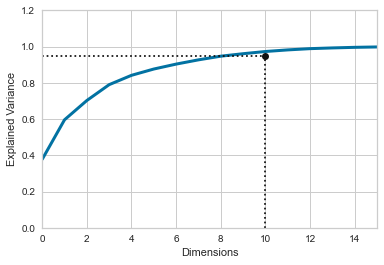

In [194]:
# PCA default

pca_default = PCA()
pca_default.fit(X_fin)

cumsum_default = np.cumsum(pca_default.explained_variance_ratio_)
d = np.argmax(cumsum_default >= 0.95) + 1 # 95 % dari total informasi = 7
print(d)

plt.figure(figsize=(6,4))
plt.plot(cumsum_default, linewidth=3)
plt.axis([0, 15, 0, 1.2])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

In [195]:
# Reduced X

pca_n = PCA(n_components=d)
X_reduced = pca_n.fit_transform(X_fin)

X_reduced

array([[-0.63564954, -0.53789915,  0.21505683, ..., -0.11250172,
         0.09972896, -0.08643402],
       [-0.47539014, -0.5205977 ,  0.45354244, ..., -0.11474029,
         0.04439398, -0.01132027],
       [-0.22017319, -0.2543247 ,  0.82072825, ..., -0.23370194,
        -0.05657473,  0.13179979],
       ...,
       [ 0.00252116,  0.97071499, -0.1412539 , ...,  0.34482235,
        -0.08167942, -0.22685819],
       [-0.22606281,  1.50814991,  0.38549789, ..., -0.38395747,
        -0.32495481,  0.27802881],
       [ 0.19960705,  0.94412895, -0.78291138, ..., -0.03848904,
         0.12612723, -0.00365582]])

In [196]:
# Showing default number of component

pca_default.n_components_

17

In [197]:
# Showing number of component chosen based on Elbow

pca_n.n_components_

10

From the results of the PCA, the result is 10 which means from 17 components, the component must be reduced to 10 components. 

# 6 - Model Definition

The technique used for determining the number of cluster are done by Elbow and Silhouette Method.

Elbow Method


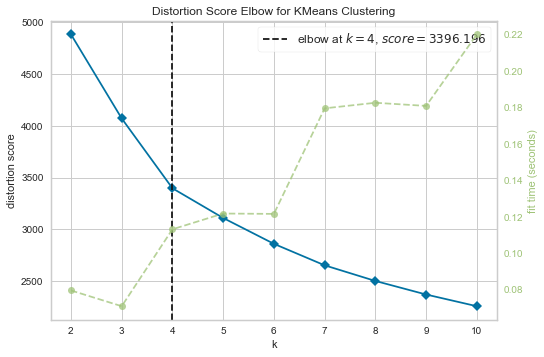

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [198]:
# Determine K based on Elbow Method

kmeans_per_k = [KMeans(n_clusters=k, random_state=20).fit(X_reduced)
                for k in range(1, 17)]

print('Elbow Method')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X_reduced)
Elbow_M.show()

In Elbow, the best K obtained is 4 with an inertia score of 3396.

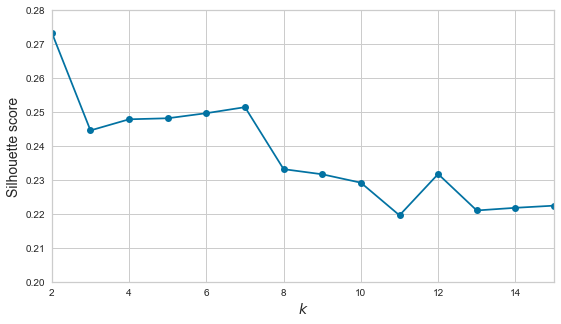

In [199]:
# Determine K based on Silhouette Method

# Silhouette Score

silhouette_scores = [silhouette_score(X_reduced, model.labels_)
                     for model in kmeans_per_k[1:]]

silhouette_scores
plt.figure(figsize=(9, 5))
plt.plot(range(2, 17), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.axis([2, 15, 0.2, 0.28])
plt.show()



As for the Silhouette, when viewed from the score, the best is if the K is 2. The higher the score, the better the k.

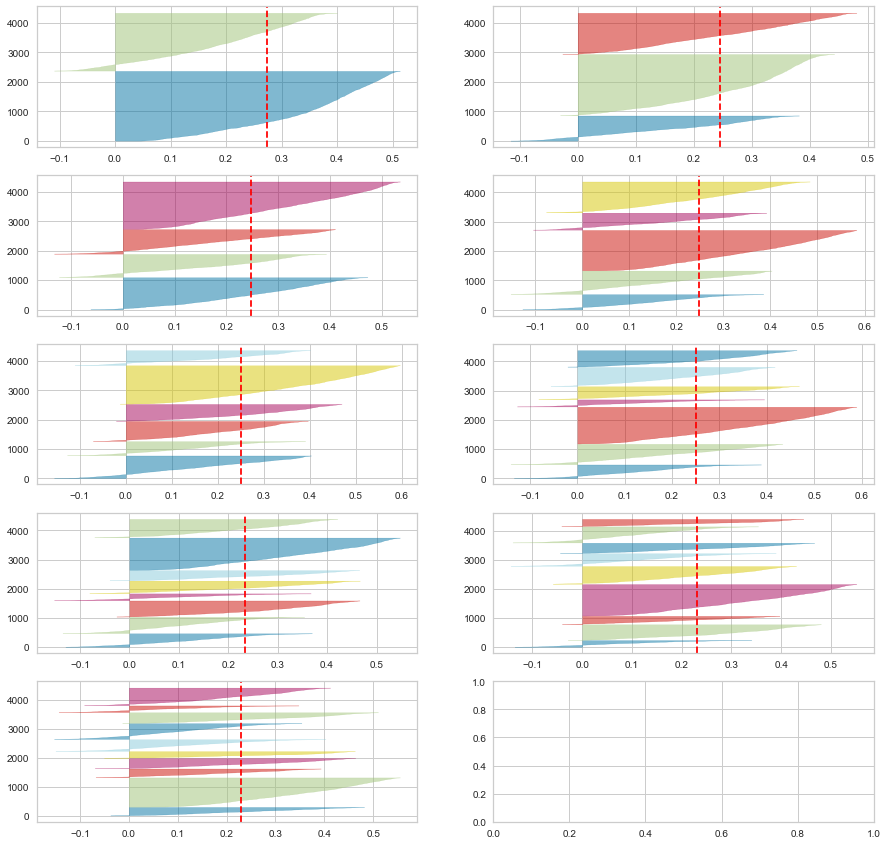

In [200]:
# Silhouette Graph

fig, ax = plt.subplots(5, 2, figsize=(15,15))
for i in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    km = KMeans(n_clusters=i, init='k-means++',random_state=20)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_reduced)

If you look at the visualization, the Silhouette has a shape with various widths so it is rather difficult to get the best number of clusters. However, from the score, it can be seen that the highest silhouette is at k = 2. When compared to Elbow, the results are very different. For this reason, because the silhouette method is considered a better method than the elbow, the k in the silhouette method was chosen, which is 2.

K-Means
---

In [201]:
# Modeling using K-Means

k = 2
kmeans = KMeans(n_clusters=k, random_state=20, init = 'k-means++', max_iter = 300)

In [202]:
# Modeling using K-Means

kmeans_mini = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=20)

DBSCAN
---

In [203]:
# Modelling Using DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=k)

Agglomerative Clustering
---

In [204]:
# Modelling Using Agglomerative Clustering

agg_clus = AgglomerativeClustering(n_clusters = k, linkage = "ward")

# 7 - Model Training

Model Training of K-Means and DBScan

In [205]:
# Training using K-Means

y_kmeans = kmeans.fit_predict(X_reduced)

y_kmeans

array([0, 0, 0, ..., 0, 0, 1], dtype=int32)

In [206]:
y_kmeans_mini = kmeans_mini.fit_predict(X_reduced)

y_kmeans_mini

array([1, 1, 1, ..., 1, 1, 0], dtype=int32)

In [207]:
# Training using DBSCAN

y_dbscan = dbscan.fit_predict(X_reduced)

y_dbscan

array([ 0,  0,  0, ..., -1, -1, 12])

In [208]:
# Training using Agglomerative Clustering

y_agg = agg_clus.fit_predict(X_reduced)

y_agg

array([0, 0, 0, ..., 0, 0, 0])

# 8 - Model Evaluation

Model Evaluation result of K-Means, DBSCAN, and Agglomerative Clustering.

10


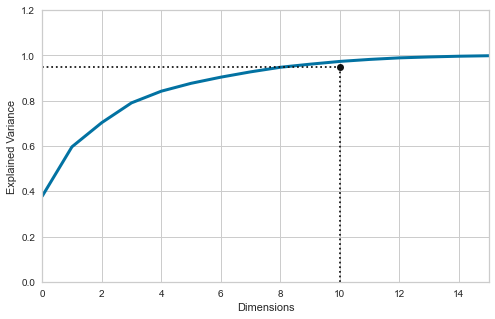

In [209]:
# PCA default

pca_default = PCA()
pca_default.fit(X_fin)

cumsum_default = np.cumsum(pca_default.explained_variance_ratio_)
d = np.argmax(cumsum_default >= 0.95) + 1 # 95 % dari total informasi = 7
print(d)

plt.figure(figsize=(8,5))
plt.plot(cumsum_default, linewidth=3)
plt.axis([0, 15, 0, 1.2])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

Previously it was known that the best number of components was when it was reduced to 10.

Elbow Method


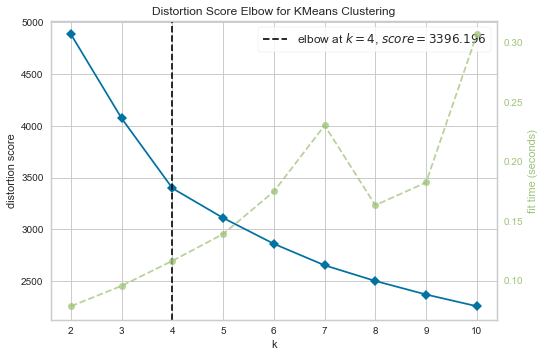

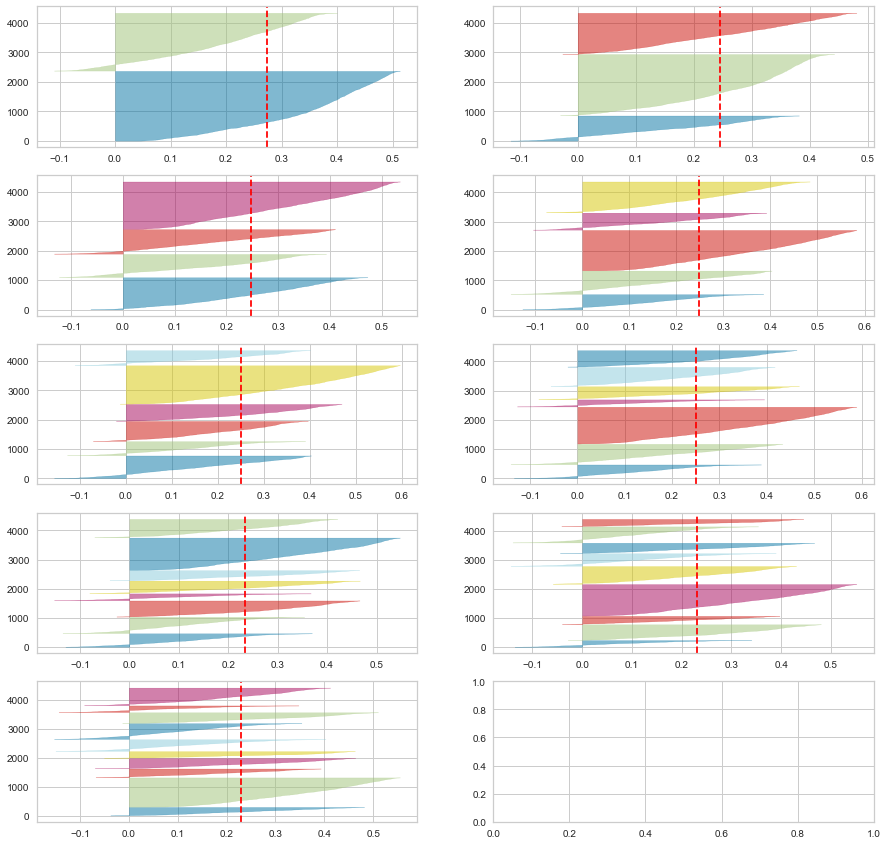

In [210]:
# Determine K based on Elbow Method

kmeans_per_k = [KMeans(n_clusters=k, random_state=20).fit(X_reduced)
                for k in range(1, 17)]

print('Elbow Method')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(X_reduced)
Elbow_M.show()

# Silhouette Graph

fig, ax = plt.subplots(5, 2, figsize=(15,15))
for i in [2, 3, 4, 5, 6, 7, 8, 9, 10]:
    km = KMeans(n_clusters=i, init='k-means++',random_state=20)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_reduced)

From the previous decision that the k taken is based on the k silhouette score, which is 2.

K-Means
---

In [211]:
# Reduced X again with 2 components

pca_2 = PCA(n_components=2)
X_reduced_2 = pca_2.fit_transform(X_reduced)

# Decision Boundaries Function 

def plot_data(X_reduced):
    plt.plot(X_reduced[:, 0], X_reduced[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X_reduced, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X_reduced.min(axis=0) - 0.1
    maxs = X_reduced.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X_reduced)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Here are the results of the clustering of the K-Means Algorithm.

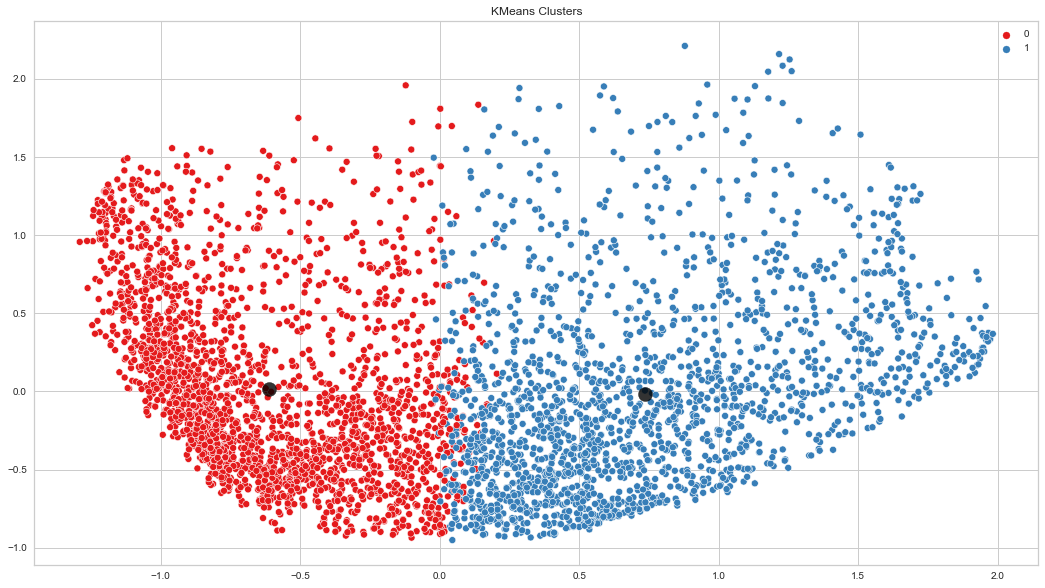

In [212]:
centers = kmeans.cluster_centers_

plt.figure(figsize=(18, 10))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=kmeans.labels_, palette='Set1')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8)
plt.title('KMeans Clusters')
plt.show()

The following is seen from the Decision Boundaries.

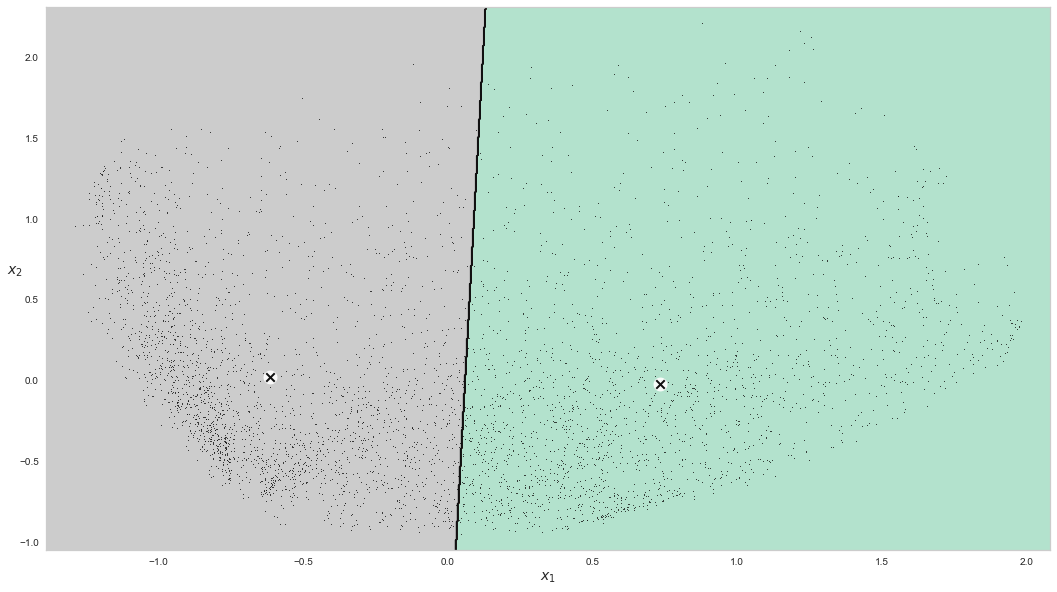

In [213]:
kmeans2 = KMeans(n_clusters=k, random_state=20, init = 'k-means++', max_iter = 300)
kmeans_2 = kmeans2.fit(X_reduced_2)

plt.figure(figsize=(18, 10))
plot_decision_boundaries(kmeans2, X_reduced_2)
plt.show()

With k equal to 4 and iterations performed on this model as many as 15 times the resulting centroid location as shown in the figure. For now, because the image is only a visualization of the class distribution, then the constituent variables will be examined.

In [214]:
# K-mean Cluster Result 

X_cluster1 = df.copy()
X_cluster1['cluster'] = kmeans.labels_
X_cluster1

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1      943.584041           0.875000     103.00            103.00   
3      461.455720           1.000000     585.00            585.00   
4     1053.594730           1.000000    1450.00           1450.00   
5     2237.238086           1.000000     120.00            120.00   
7      424.994385           0.772728    1200.00           1200.00   
...           ...                ...        ...               ...   
4470  1079.008102           1.000000       0.00              0.00   
4471   809.582978           0.909091       0.00              0.00   
4472  3386.490883           1.000000     560.98            427.22   
4473  4840.545574           1.000000    1595.93           1500.00   
4474  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
5                       0.00      0.000000             0.125000   
7                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   2775.621316             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   2775.621316             0.454545   
4474                  805.14   2775.621316             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
5                       0.125000                          0.000000   
7                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                   0.000000                 0              1        1000.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
5                   0.000000                 0              1        2500.0   
7                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                10             25        6000.0   
4474                0.545455                10             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
1      215.325023        410.484825          0.000000       8        0  
3      258.032630        151.696433          0.000000       8        0  
4      397.090516        227.143184          0.000000       8        0  
5      343.102984        712.986387          0.000000       8        0  
7       57.266292         56.720210          0.000000       8        0  
...           ...               ...               ...     ...      ...  
4470  1379.635287        271.364415          0.090909      11        0  
44

In [215]:
# Grouping each Cluster

cluster_0_kmeans = X_cluster1[(X_cluster1['cluster'] == 0)]
cluster_1_kmeans = X_cluster1[(X_cluster1['cluster'] == 1)]

<AxesSubplot:xlabel='INSTALLMENTS_PURCHASES', ylabel='Count'>

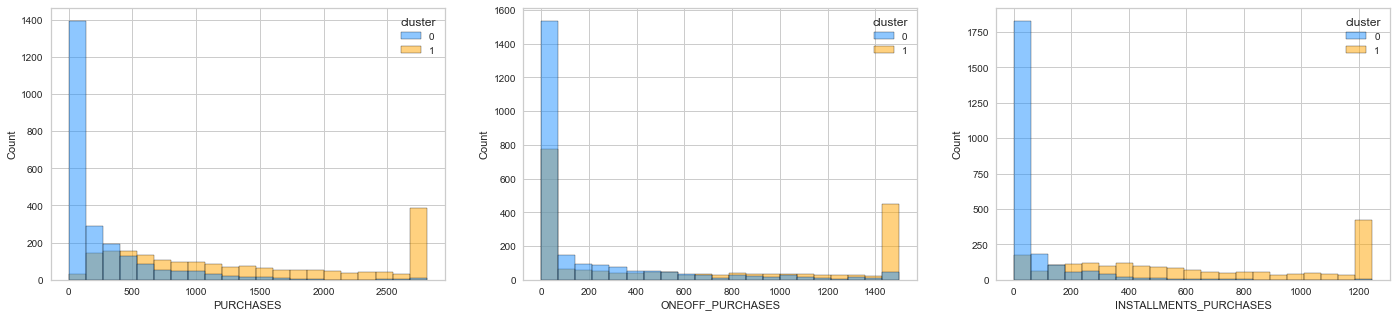

In [216]:
fig, ax =plt.subplots(1,3, figsize = (24,5))
sns.histplot(X_cluster1, x="PURCHASES", hue="cluster", palette=['dodgerblue','orange'],ax=ax[0])
sns.histplot(X_cluster1, x="ONEOFF_PURCHASES", hue="cluster", palette=['dodgerblue','orange'],ax=ax[1])
sns.histplot(X_cluster1, x="INSTALLMENTS_PURCHASES", hue="cluster", palette=['dodgerblue','orange'],ax=ax[2])

From the description of the three purchases above, it can be concluded that cluster 0 tends to have fewer purchases amount in each each than cluster 1.

<AxesSubplot:xlabel='BALANCE', ylabel='Count'>

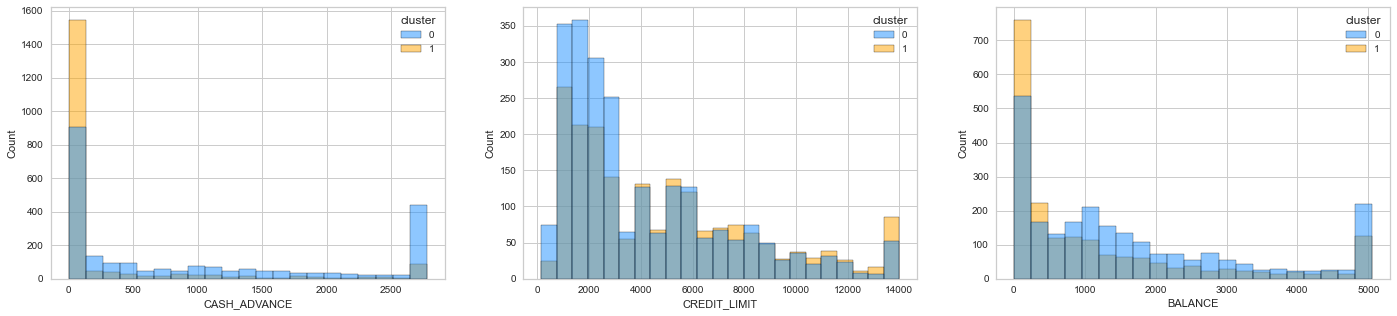

In [217]:
fig, ax =plt.subplots(1,3, figsize = (24,5))
sns.histplot(X_cluster1, x="CASH_ADVANCE", hue="cluster", palette=['dodgerblue','orange'],ax=ax[0])
sns.histplot(X_cluster1, x="CREDIT_LIMIT", hue="cluster", palette=['dodgerblue','orange'],ax=ax[1])
sns.histplot(X_cluster1, x="BALANCE", hue="cluster", palette=['dodgerblue','orange'],ax=ax[2])

In Cash Advance, Cluster 1 tends to make cash advances less frequently than Cluster 0. As for the credit limit, the two clusters are not too different.

<AxesSubplot:xlabel='CASH_ADVANCE_FREQUENCY', ylabel='Count'>

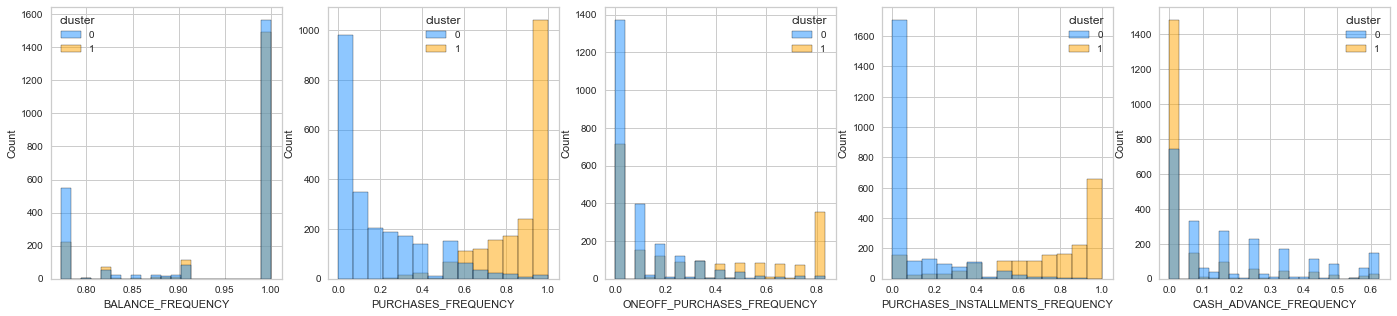

In [218]:
fig, ax =plt.subplots(1,5, figsize = (24,5))
sns.histplot(X_cluster1, x="BALANCE_FREQUENCY", hue="cluster", palette=['dodgerblue','orange'],ax=ax[0])
sns.histplot(X_cluster1, x="PURCHASES_FREQUENCY", hue="cluster", palette=['dodgerblue','orange'],ax=ax[1])
sns.histplot(X_cluster1, x="ONEOFF_PURCHASES_FREQUENCY", hue="cluster", palette=['dodgerblue','orange'],ax=ax[2])
sns.histplot(X_cluster1, x="PURCHASES_INSTALLMENTS_FREQUENCY", hue="cluster", palette=['dodgerblue','orange'],ax=ax[3])
sns.histplot(X_cluster1, x="CASH_ADVANCE_FREQUENCY", hue="cluster", palette=['dodgerblue','orange'],ax=ax[4])

On the Balance Frequency, there is not too much of a significant difference. Meanwhile, in the Purchase frequency and Purchase installments frequency, cluster 1 tends to be larger than cluster 0. For the frequency at One Off Purchase Frequency, cluster 0 does one go purchasing less frequently. Meanwhile, in Cash Advance, cluster 1 pays less cash in advance.

<AxesSubplot:xlabel='PRC_FULL_PAYMENT', ylabel='Count'>

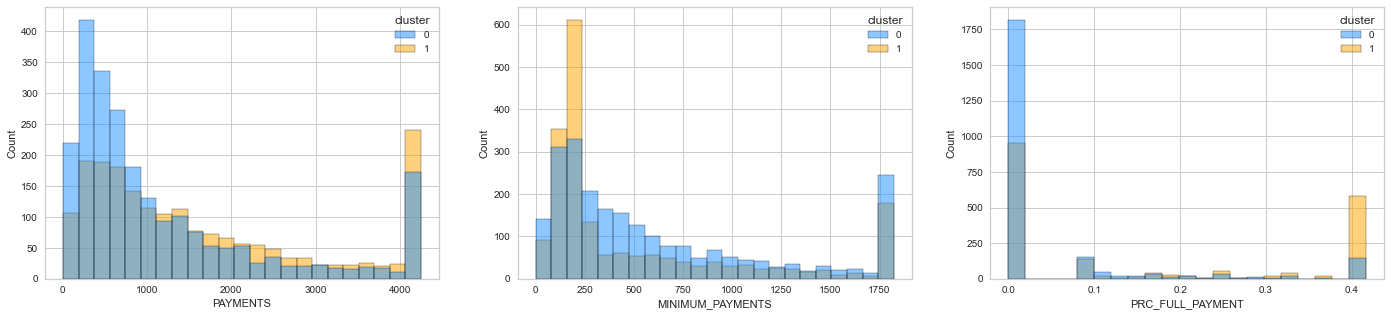

In [219]:
fig, ax =plt.subplots(1,3, figsize = (24,5))
sns.histplot(X_cluster1, x="PAYMENTS", hue="cluster", palette=['dodgerblue','orange'],ax=ax[0])
sns.histplot(X_cluster1, x="MINIMUM_PAYMENTS", hue="cluster", palette=['dodgerblue','orange'],ax=ax[1])
sns.histplot(X_cluster1, x="PRC_FULL_PAYMENT", hue="cluster", palette=['dodgerblue','orange'],ax=ax[2])

In terms of payments, the two clusters are not too different, but at the minimum payment, the two clusters are almost the same but cluster 1 makes a lower minimum payment than cluster 0. The percentage of payments is also not too different, but cluster 0 the percentage of payments tends to be lower.

<AxesSubplot:xlabel='TENURE', ylabel='Count'>

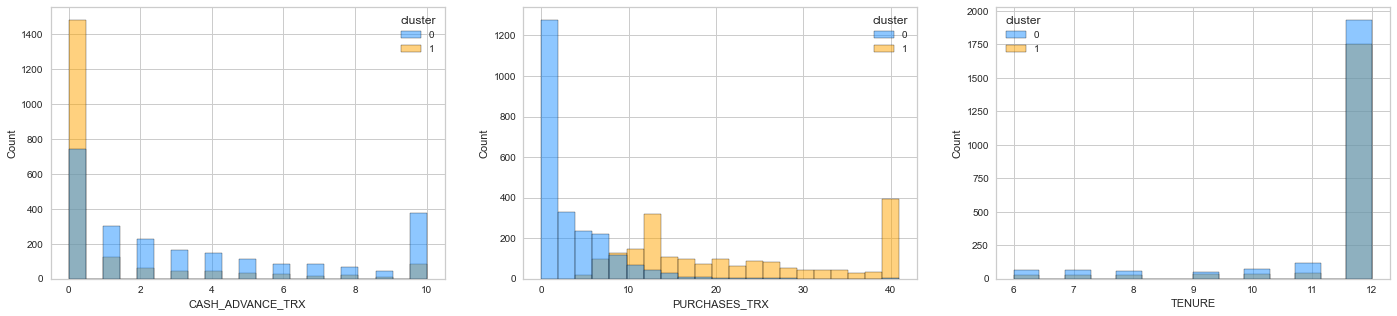

In [220]:
fig, ax =plt.subplots(1,3, figsize = (24,5))
sns.histplot(X_cluster1, x="CASH_ADVANCE_TRX", hue="cluster", palette=['dodgerblue','orange'],ax=ax[0])
sns.histplot(X_cluster1, x="PURCHASES_TRX", hue="cluster", palette=['dodgerblue','orange'],ax=ax[1])
sns.histplot(X_cluster1, x="TENURE", hue="cluster", palette=['dodgerblue','orange'],ax=ax[2])

Cluster 1 rarely or never makes Cash in Advance transactions. Cluster 0 tends to make fewer purchases transaction. In tenure, all data are equally dominated by tenure 12.

From the graph above, it is rather difficult to draw conclusions, but other factors which has significant difference can be seen:

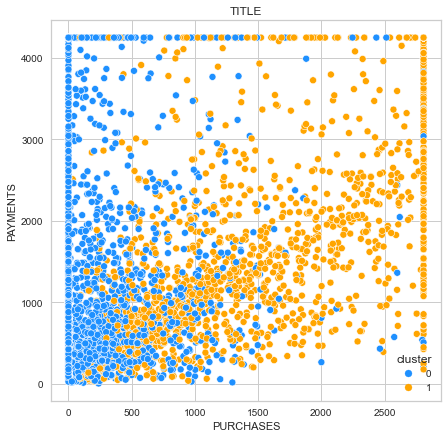

In [221]:
plt.figure(figsize = (7,7))
sns.scatterplot(x='PURCHASES', y='PAYMENTS', data=X_cluster1, hue='cluster', palette=['dodgerblue','orange'])
plt.title('TITLE')
plt.show()

Cluster 0 predominantly makes fewer purchases.

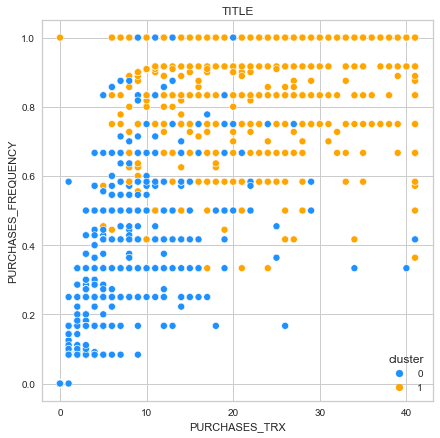

In [222]:
plt.figure(figsize = (7,7))
sns.scatterplot(x='PURCHASES_TRX', y='PURCHASES_FREQUENCY', data=X_cluster1, hue='cluster', palette=['dodgerblue','orange'])
plt.title('TITLE')
plt.show()

Cluster 0 rarely makes purchases activity.

One of the drawbacks of K-means is that K points are initialized randomly so that the grouping of the data obtained can be different so there is no guarantee to find the optimal set of clusters. But K-means consider as easier to implemented and very adaptable. When we add up each cluster, we get the following results.

Text(0.5, 1.0, 'Cluster Distribution')

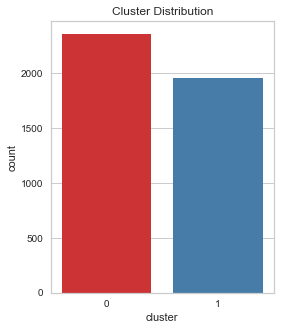

In [223]:
plt.figure(figsize=(4, 5))
sns.countplot(data=X_cluster1, x='cluster', palette='Set1')
plt.title('Cluster Distribution')
# clusters=pd.concat([data, pd.DataFrame({'cluster':labels})], axis=1)plt.show()

MiniBatch
---

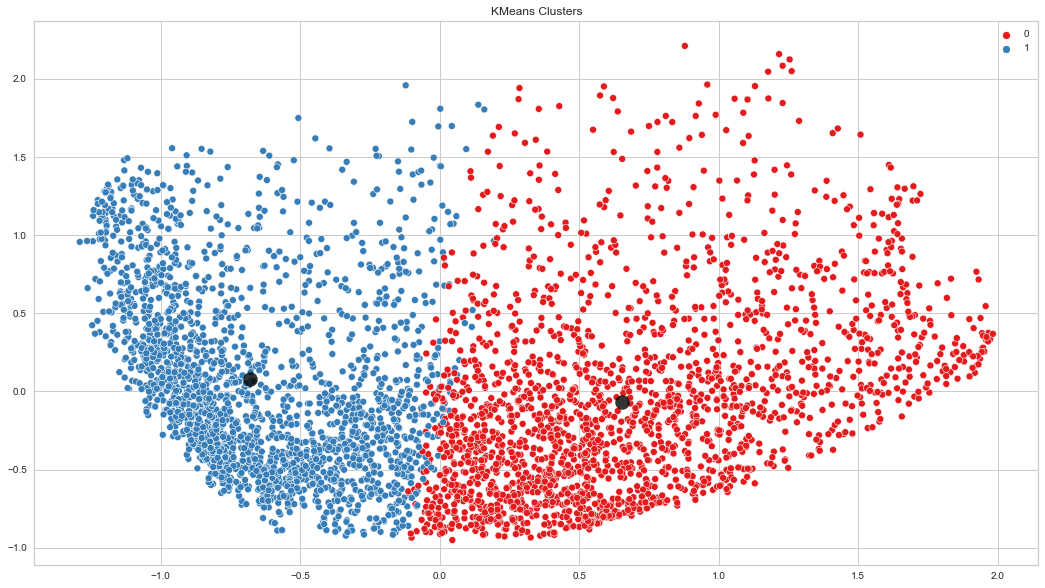

In [224]:
centers = kmeans_mini.cluster_centers_

plt.figure(figsize=(18, 10))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=kmeans_mini.labels_, palette='Set1')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.8)
plt.title('KMeans Clusters')
plt.show()

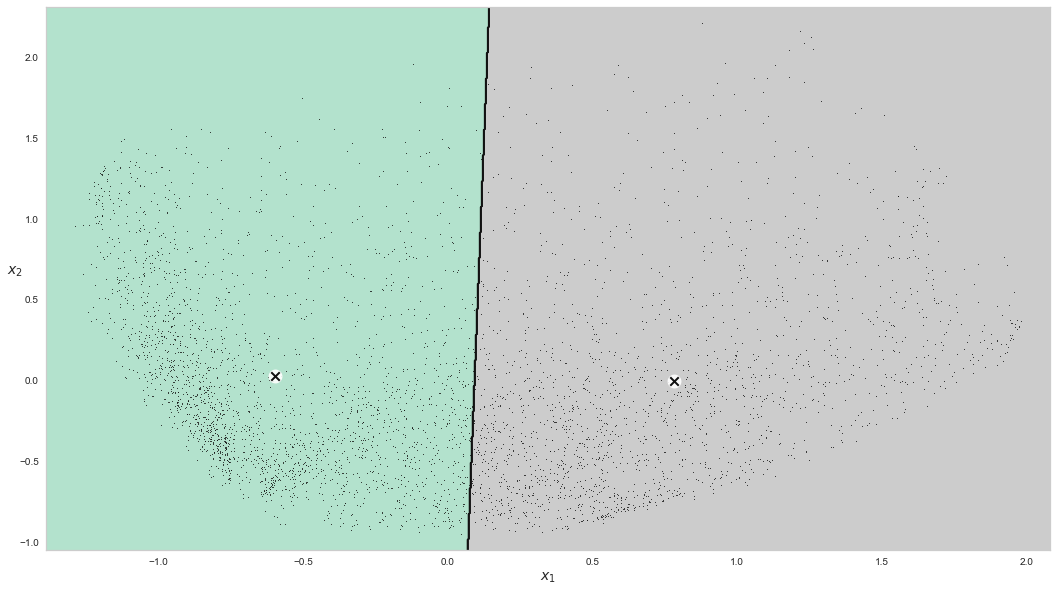

In [225]:
kmeans3 = MiniBatchKMeans(n_clusters=k, batch_size=100, random_state=20) #  
kmeans_3 = kmeans3.fit(X_reduced_2)

plt.figure(figsize=(18, 10))
plot_decision_boundaries(kmeans3, X_reduced_2)
plt.show()

In [226]:
# K-mean Cluster Result 

X_cluster3 = df.copy()
X_cluster3['cluster'] = kmeans_mini.labels_
X_cluster3

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1      943.584041           0.875000     103.00            103.00   
3      461.455720           1.000000     585.00            585.00   
4     1053.594730           1.000000    1450.00           1450.00   
5     2237.238086           1.000000     120.00            120.00   
7      424.994385           0.772728    1200.00           1200.00   
...           ...                ...        ...               ...   
4470  1079.008102           1.000000       0.00              0.00   
4471   809.582978           0.909091       0.00              0.00   
4472  3386.490883           1.000000     560.98            427.22   
4473  4840.545574           1.000000    1595.93           1500.00   
4474  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
5                       0.00      0.000000             0.125000   
7                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   2775.621316             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   2775.621316             0.454545   
4474                  805.14   2775.621316             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
5                       0.125000                          0.000000   
7                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                   0.000000                 0              1        1000.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
5                   0.000000                 0              1        2500.0   
7                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                10             25        6000.0   
4474                0.545455                10             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
1      215.325023        410.484825          0.000000       8        1  
3      258.032630        151.696433          0.000000       8        1  
4      397.090516        227.143184          0.000000       8        1  
5      343.102984        712.986387          0.000000       8        1  
7       57.266292         56.720210          0.000000       8        1  
...           ...               ...               ...     ...      ...  
4470  1379.635287        271.364415          0.090909      11        1  
44

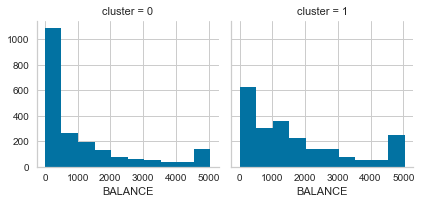

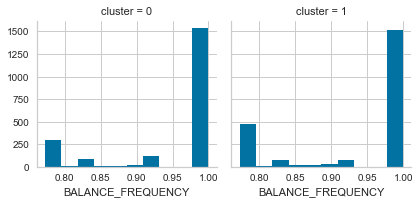

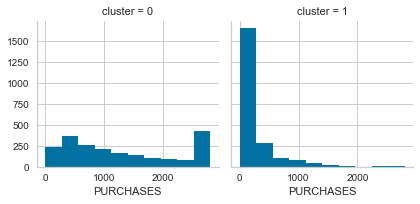

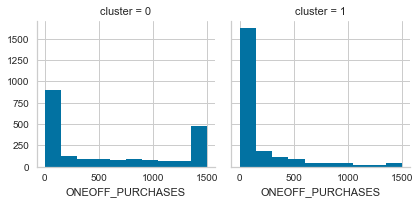

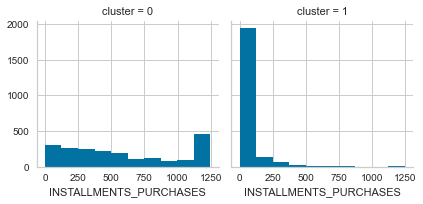

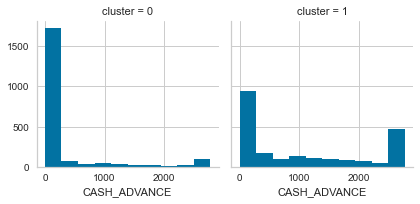

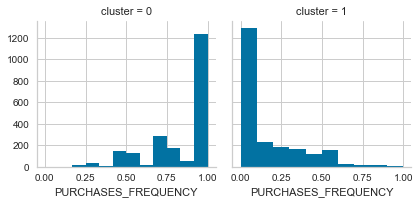

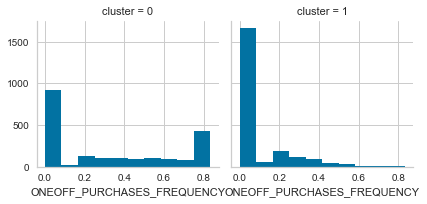

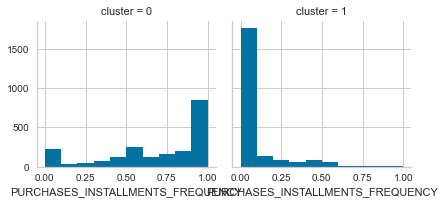

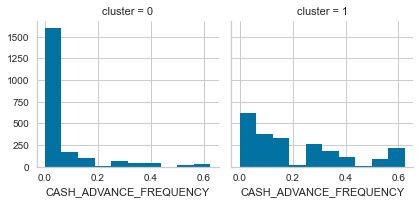

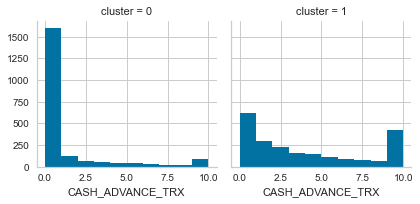

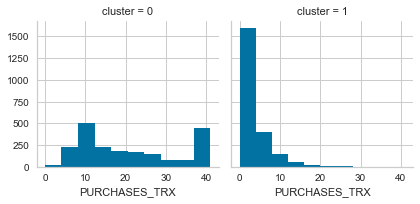

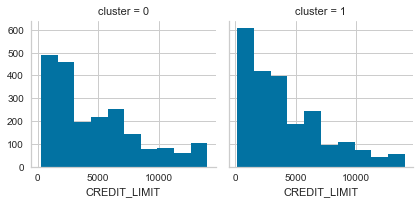

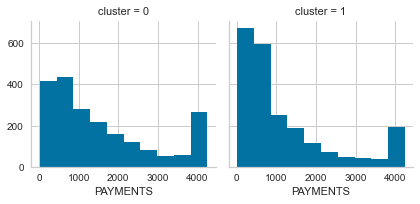

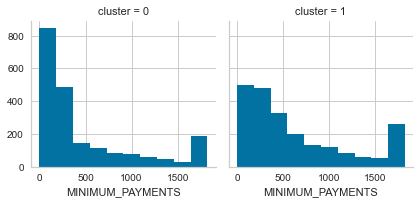

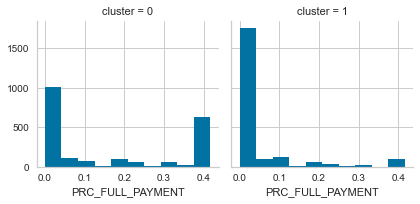

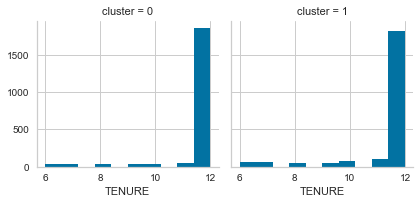

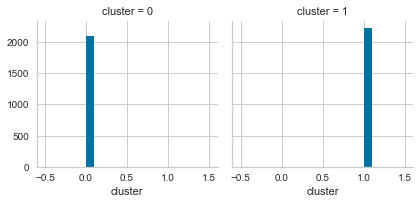

In [227]:
# Grig Cluster

for c in X_cluster3:
    grid= sns.FacetGrid(X_cluster3, col='cluster')
    grid.map(plt.hist, c)

If MiniBatch is done with Batch size 100 , the results are not too different. The only difference is the labeling of the cluster name. The results can be different if the Batch size is changed. Here are the sums of each of the same clusters as the previous k-means.

Text(0.5, 1.0, 'Cluster Distribution')

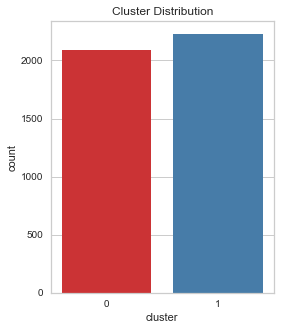

In [228]:
plt.figure(figsize=(4, 5))
sns.countplot(data=X_cluster3, x='cluster', palette='Set1')
plt.title('Cluster Distribution')

DBSCAN
---

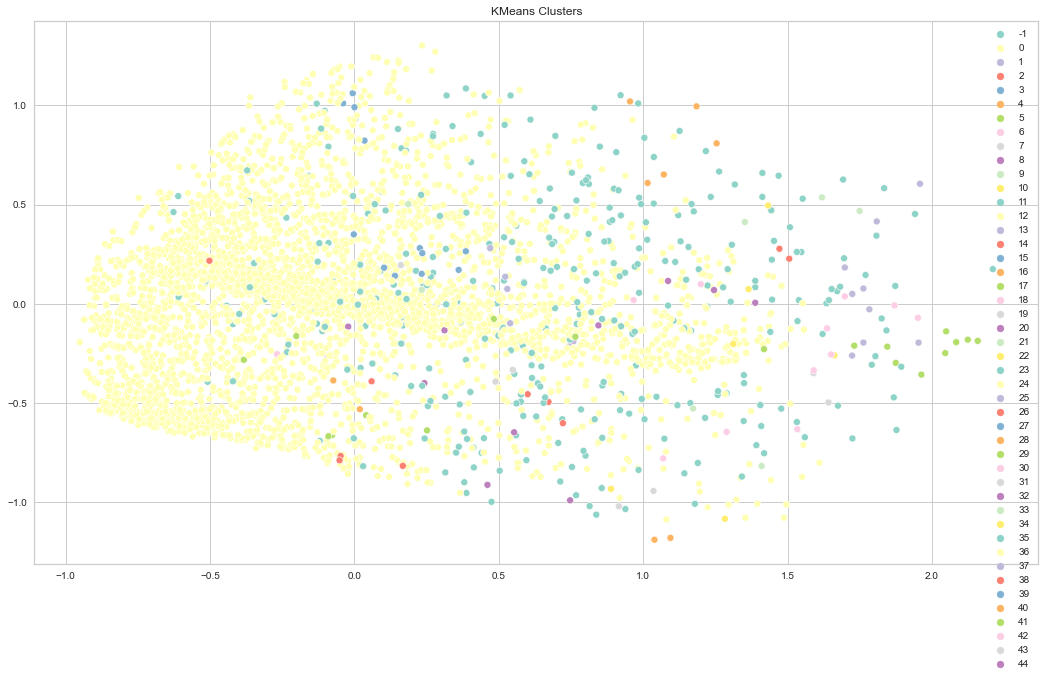

In [229]:
plt.figure(figsize=(18, 10))
sns.scatterplot(x=X_reduced[:, 1], y=X_reduced[:, 2], hue=dbscan.labels_, palette='Set3')
plt.title('KMeans Clusters')
plt.show()

In [230]:
X_cluster2 = df.copy()
X_cluster2['cluster'] = dbscan.labels_
X_cluster2

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1      943.584041           0.875000     103.00            103.00   
3      461.455720           1.000000     585.00            585.00   
4     1053.594730           1.000000    1450.00           1450.00   
5     2237.238086           1.000000     120.00            120.00   
7      424.994385           0.772728    1200.00           1200.00   
...           ...                ...        ...               ...   
4470  1079.008102           1.000000       0.00              0.00   
4471   809.582978           0.909091       0.00              0.00   
4472  3386.490883           1.000000     560.98            427.22   
4473  4840.545574           1.000000    1595.93           1500.00   
4474  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
5                       0.00      0.000000             0.125000   
7                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   2775.621316             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   2775.621316             0.454545   
4474                  805.14   2775.621316             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
5                       0.125000                          0.000000   
7                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                   0.000000                 0              1        1000.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
5                   0.000000                 0              1        2500.0   
7                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                10             25        6000.0   
4474                0.545455                10             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
1      215.325023        410.484825          0.000000       8        0  
3      258.032630        151.696433          0.000000       8        0  
4      397.090516        227.143184          0.000000       8        0  
5      343.102984        712.986387          0.000000       8        0  
7       57.266292         56.720210          0.000000       8        0  
...           ...               ...               ...     ...      ...  
4470  1379.635287        271.364415          0.090909      11        0  
44

In DBSCAN, the number of clusters is not determined manually, only depends on the epsilon. Based on the graph, the number of outliers (-1) is quite dominating, but it is not clear what causes the outliers. For this reason, DBSCAN is more suitable for identifying outliers.

Agglomerative Clustering
---

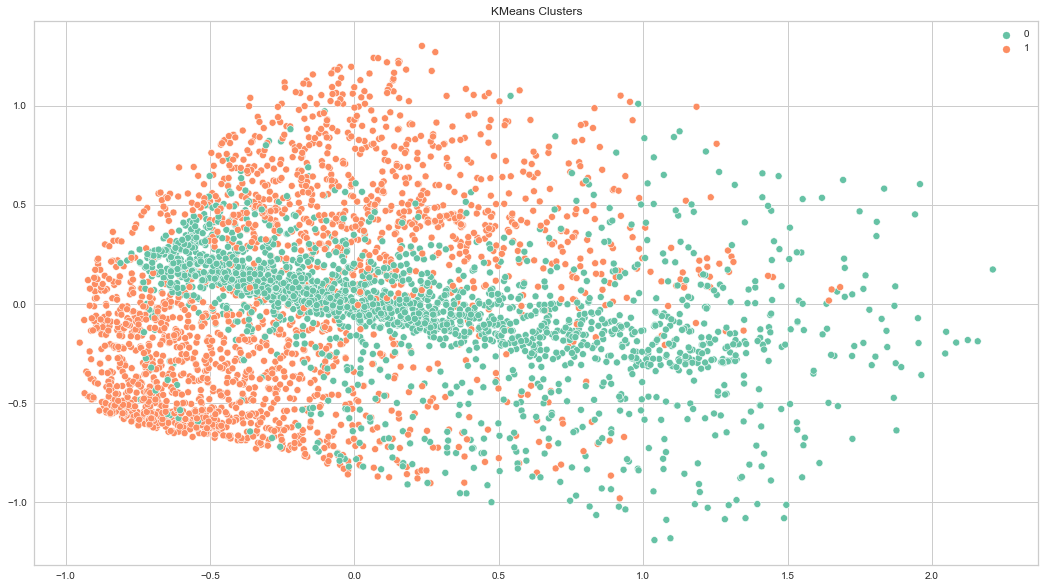

In [231]:

plt.figure(figsize=(18, 10))
sns.scatterplot(x=X_reduced[:, 1], y=X_reduced[:, 2], hue=agg_clus.labels_, palette='Set2')
plt.title('KMeans Clusters')
plt.show()

In [232]:
# K-mean Cluster Result 

X_cluster3 = df.copy()
X_cluster3['cluster'] = agg_clus.labels_
X_cluster3

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1      943.584041           0.875000     103.00            103.00   
3      461.455720           1.000000     585.00            585.00   
4     1053.594730           1.000000    1450.00           1450.00   
5     2237.238086           1.000000     120.00            120.00   
7      424.994385           0.772728    1200.00           1200.00   
...           ...                ...        ...               ...   
4470  1079.008102           1.000000       0.00              0.00   
4471   809.582978           0.909091       0.00              0.00   
4472  3386.490883           1.000000     560.98            427.22   
4473  4840.545574           1.000000    1595.93           1500.00   
4474  1977.007090           1.000000    1032.04            226.90   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                       0.00      0.000000             0.125000   
3                       0.00      0.000000             0.125000   
4                       0.00      0.000000             0.125000   
5                       0.00      0.000000             0.125000   
7                       0.00      0.000000             0.125000   
...                      ...           ...                  ...   
4470                    0.00   1259.571764             0.000000   
4471                    0.00   2775.621316             0.000000   
4472                  133.76   2008.153534             1.000000   
4473                    0.00   2775.621316             0.454545   
4474                  805.14   2775.621316             0.909091   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                       0.125000                          0.000000   
3                       0.125000                          0.000000   
4                       0.125000                          0.000000   
5                       0.125000                          0.000000   
7                       0.125000                          0.000000   
...                          ...                               ...   
4470                    0.000000                          0.000000   
4471                    0.000000                          0.000000   
4472                    0.727273                          0.363636   
4473                    0.454545                          0.000000   
4474                    0.090909                          0.818182   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                   0.000000                 0              1        1000.0   
3                   0.000000                 0              1        1000.0   
4                   0.000000                 0              1        1500.0   
5                   0.000000                 0              1        2500.0   
7                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
4470                0.545455                 9              0        1200.0   
4471                0.545455                 7              0        4150.0   
4472                0.545455                 9             20       10100.0   
4473                0.545455                10             25        6000.0   
4474                0.545455                10             17        4000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
1      215.325023        410.484825          0.000000       8        0  
3      258.032630        151.696433          0.000000       8        0  
4      397.090516        227.143184          0.000000       8        0  
5      343.102984        712.986387          0.000000       8        0  
7       57.266292         56.720210          0.000000       8        0  
...           ...               ...               ...     ...      ...  
4470  1379.635287        271.364415          0.090909      11        0  
44

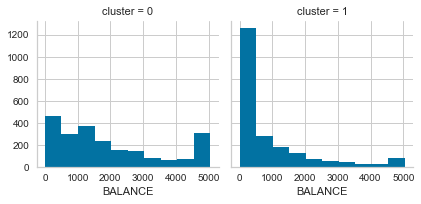

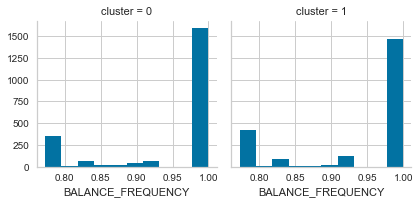

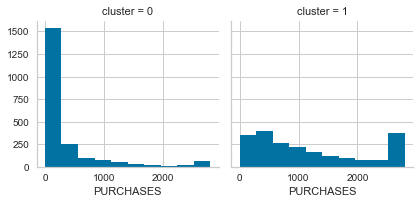

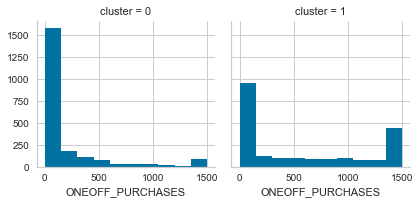

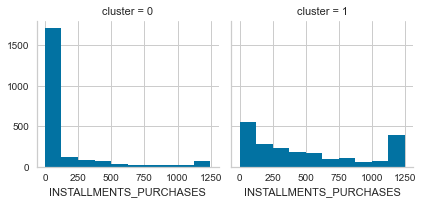

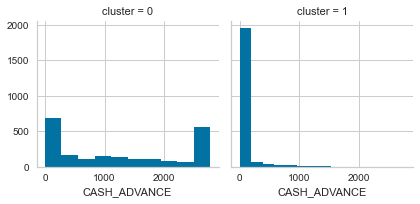

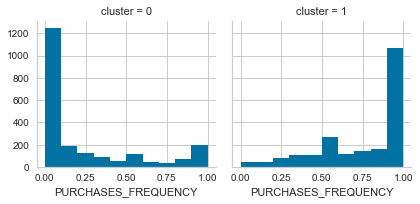

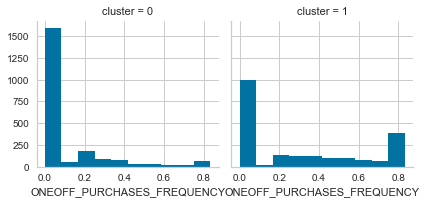

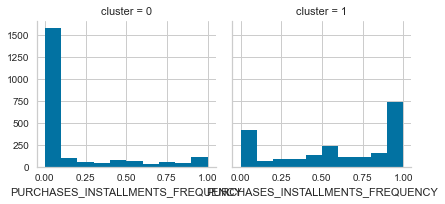

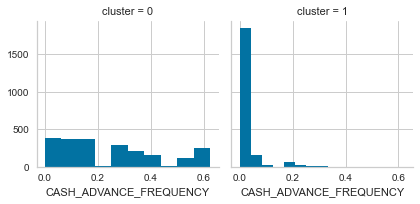

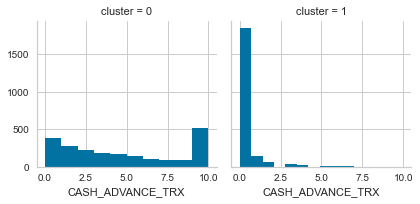

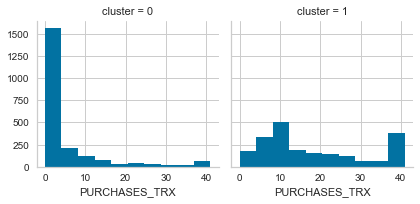

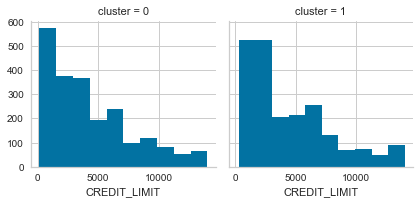

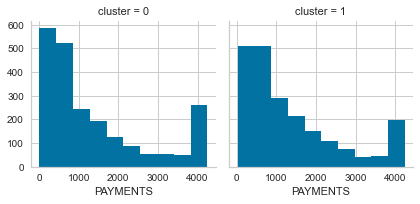

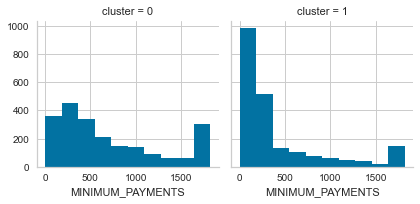

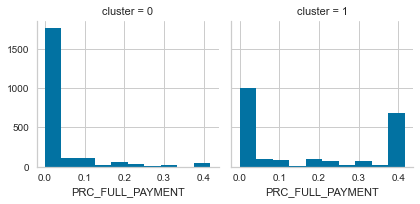

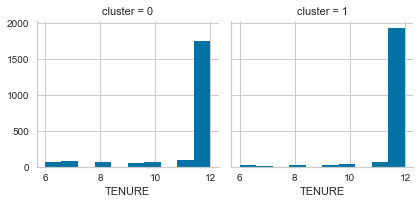

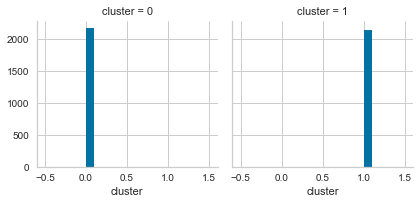

In [233]:
# Grig Cluster

for c in X_cluster3:
    grid= sns.FacetGrid(X_cluster3, col='cluster')
    grid.map(plt.hist, c)

Some of the Characteristic can be described :

1. Cluster 1 has less balance
2. Cluster 0 makes fewer or fewer purchases including One off and installment
3. Cluster 1 rarely or less do Cash in Advance.
4. Cluster 0 does any purchases less often.
5. Credit limit and payment are not too different
6. Cluster 1 is less likely to make minimum payments.
7. The percentage of making full payments in cluster 0 is smaller.
8. Tenure in both clusters is the same,

When observed the characteristics are not too far with K-means.

# 9 - Model Inference

In [234]:
# Split between numerical columns and categorical columns

inf_mm_scaled = mm_scaler.transform(df_inf[num_minmax])
inf_unscaled = np.array(df_inf[unscale_columns])

# Concate Inference

inf_final = np.concatenate([inf_mm_scaled, inf_unscaled], axis=1)

# Turn into Data Frame

df_inf_final = pd.DataFrame(inf_final, columns=[num_minmax+unscale_columns])
df_inf_final


BALANCE PURCHASES ONEOFF_PURCHASES INSTALLMENTS_PURCHASES CASH_ADVANCE  \
0  0.053473  0.341517         0.501933               0.165289     0.000000   
1  0.051115  0.851696         0.802120               0.953292     0.017802   
2  0.357673  0.079634         0.149067               0.000000     0.308063   
3  0.008126  0.147198         0.088873               0.224632     0.000000   
4  0.040390  0.417878         0.711800               0.084751     0.000000   
5  0.005100  0.103282         0.000000               0.232655     0.000000   
6  0.002645  0.042545         0.040180               0.047486     0.000000   
7  0.424498  0.081325         0.152233               0.000000     0.687652   
8  0.090713  0.246387         0.302600               0.190873     0.078785   
9  0.003116  0.025642         0.048000               0.000000     0.000000   

  CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  PAYMENTS MINIMUM_PAYMENTS  \
0              0.0      0.634146     0.126354  0.485466         0.118817   
1              0.1      0.780488     0.350181  0.597094         0.115674   
2              0.8      0.024390     0.133574  0.235455         0.362622   
3              0.0      0.195122     0.422383  0.111094         0.058425   
4              0.0      0.487805     0.350181  0.204316         0.075682   
5              0.0      0.292683     0.097473  0.060730         0.093684   
6              0.0      0.097561     0.530686  0.124961         0.072678   
7              0.1      0.170732     0.277978  0.593295         0.278792   
8              0.3      0.341463     0.061372  0.079862         0.138304   
9              0.0      0.121951     0.061372  0.009258         0.112799   

  PRC_FULL_PAYMENT    TENURE BALANCE_FREQUENCY PURCHASES_FREQUENCY  \
0         0.000000  1.000000          0.909091            0.750000   
1         0.799998  1.000000          1.000000            1.000000   
2         0.000000  1.000000          1.000000            0.083333   
3         1.499997  1.000000          0.727273            0.583333   
4         0.000000  0.666667          1.000000            0.700000   
5         2.399995  1.000000          1.000000            1.000000   
6         0.000000  1.000000          0.363636            0.250000   
7         0.000000  1.000000          1.000000            0.333333   
8         0.000000  1.000000          0.727273            0.583333   
9         0.000000  1.000000          0.727273            0.250000   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.166667                         0.666667   
1                   0.666667                         1.000000   
2                   0.083333                         0.000000   
3                   0.083333                         0.416667   
4                   0.700000                         0.300000   
5                   0.000000                         0.916667   
6                   0.166667                         0.083333   
7                   0.333333                         0.000000   
8                   0.166667                         0.416667   
9                   0.250000                         0.000000   

  CASH_ADVANCE_FREQUENCY  
0               0.000000  
1               0.083333  
2               0.500000  
3               0.000000  
4               0.000000  
5               0.000000  
6               0.000000  
7               0.083333  
8               0.166667  
9               0.000000

In [235]:
df_reduced = pca_n.transform(inf_final)

kmeans_inf = pd.DataFrame(kmeans.predict(df_reduced), columns=["kmeans cluster"])
kmeans_mini_inf = pd.DataFrame(kmeans_mini.predict(df_reduced), columns=["kmeans minibatch cluster"])
dbscan_inf = pd.DataFrame(dbscan.redict(df_reduced), columns=["dbscan cluster"])
agg_clus_inf = pd.DataFrame(agg_clus.predict(df_reduced), columns=["agg_clus cluster"])

In [236]:
df_inf_with_pred = pd.concat([df_inf_final, kmeans_inf, kmeans_mini_inf, dbscan_inf, agg_clus_inf], axis = 1)
df_inf_with_pred

(BALANCE,)  (PURCHASES,)  (ONEOFF_PURCHASES,)  (INSTALLMENTS_PURCHASES,)  \
0    0.053473      0.341517             0.501933                   0.165289   
1    0.051115      0.851696             0.802120                   0.953292   
2    0.357673      0.079634             0.149067                   0.000000   
3    0.008126      0.147198             0.088873                   0.224632   
4    0.040390      0.417878             0.711800                   0.084751   
5    0.005100      0.103282             0.000000                   0.232655   
6    0.002645      0.042545             0.040180                   0.047486   
7    0.424498      0.081325             0.152233                   0.000000   
8    0.090713      0.246387             0.302600                   0.190873   
9    0.003116      0.025642             0.048000                   0.000000   

   (CASH_ADVANCE,)  (CASH_ADVANCE_TRX,)  (PURCHASES_TRX,)  (CREDIT_LIMIT,)  \
0         0.000000                  0.0          0.634146         0.126354   
1         0.017802                  0.1          0.780488         0.350181   
2         0.308063                  0.8          0.024390         0.133574   
3         0.000000                  0.0          0.195122         0.422383   
4         0.000000                  0.0          0.487805         0.350181   
5         0.000000                  0.0          0.292683         0.097473   
6         0.000000                  0.0          0.097561         0.530686   
7         0.687652                  0.1          0.170732         0.277978   
8         0.078785                  0.3          0.341463         0.061372   
9         0.000000                  0.0          0.121951         0.061372   

   (PAYMENTS,)  (MINIMUM_PAYMENTS,)  (PRC_FULL_PAYMENT,)  (TENURE,)  \
0     0.485466             0.118817             0.000000   1.000000   
1     0.597094             0.115674             0.799998   1.000000   
2     0.235455             0.362622             0.000000   1.000000   
3     0.111094             0.058425             1.499997   1.000000   
4     0.204316             0.075682             0.000000   0.666667   
5     0.060730             0.093684             2.399995   1.000000   
6     0.124961             0.072678             0.000000   1.000000   
7     0.593295             0.278792             0.000000   1.000000   
8     0.079862             0.138304             0.000000   1.000000   
9     0.009258             0.112799             0.000000   1.000000   

   (BALANCE_FREQUENCY,)  (PURCHASES_FREQUENCY,)  \
0              0.909091                0.750000   
1              1.000000                1.000000   
2              1.000000                0.083333   
3              0.727273                0.583333   
4              1.000000                0.700000   
5              1.000000                1.000000   
6              0.363636                0.250000   
7              1.000000                0.333333   
8              0.727273                0.583333   
9              0.727273                0.250000   

   (ONEOFF_PURCHASES_FREQUENCY,)  (PURCHASES_INSTALLMENTS_FREQUENCY,)  \
0                       0.166667                             0.666667   
1                       0.666667                             1.000000   
2                       0.083333                             0.000000   
3                       0.083333                             0.416667   
4                       0.700000                             0.300000   
5                       0.000000                             0.916667   
6                       0.166667                             0.083333   
7                       0.333333                             0.000000   
8                       0.166667                             0.416667   
9                       0.250000                             0.000000   

   (CASH_ADVANCE_FREQUENCY,)  kmeans cluster  kmeans minibatch cluster  \
0                   0.000000               1        

# 11 - Conclusion

Based on Exploratory Data Analysis we can conclude that:
 - Most of the data obtained are overlapping which means most user own it or have it in less amount.
- The frequency data is also overlapping, but the balance frequency is updated more often, while the purchase frequency is almost equal. while the rest are not done frequently.
- the various kinds of balances owned by user, How frequently the Balance is updated does not determine the balance.
- Likewise with purchases and others. Each of it also unaffected by its frequency. However, purchases, one off purchases, and installment purchases have a positive relationship with each other
- credit limit does not determined by purchases or balanece by user but In general, the bank will determine the credit limit based on the amount of income or monthly salary.
- In this bank, credit card have certain periode to active. Tenure owned by every user is different, but mostly user agreed that if whithin 12 period the credit card are unusedthen it can be deactivate. Each tenure based on service agreement.
- The dataset above is Numerical data which may be a bit difficult to categorize. In fact, it only needs to be done whether there is a correlation between the data.

In this case, clustering will be carried out using the K-means, DBSCAN, and agglomerative Clustering algorithms. After cleaning and scaling the data with Minmax scaler, Dimensionality Reduction is performed. Dimensionality Reduction is done by PCA algorithm with 10 components obtained. After reduction, determine k using elbow or silhouette method. In Elbow, the best K obtained is 4 while As for the Silhouette, when viewed from the score, the best is if the K is 2. Then it is decided that the k taken is k = 2 which means there will be 2 clusters. Then cluster the reduced data with these algorithms. At the end, when viewd from the most prominent, the obtained characteristics are: Cluster 0 predominantly makes fewer purchases and Cluster 0 rarely makes purchases activity.

Clustering is often done for this type of analysis with the goal of segmenting the market. There are no parametrics to assess whether the clustering that has been done is decent or not. For this reason, further exploration needs to be carried out to match which clustering should be chosen so that its characteristics can be more prominent.

# Conceptual Problems

## 1. What is meant by inertia in the K-Means algorithm?
---

kmeans calculates the distance from each data to each centroid and assigns it to the centroid with a certain distance. K is a parameter that represents the number of clusters whose data points will be grouped. Then the k will determine the number of centroids that will determine the group of each data. These centroids are placed randomly. The existing data is calculated the distance to the centroid by using the Euclidean formula. Next creates new centroids by taking the mean value of all of the samples assigned to each previous centroid.
  Do the step until the centroid position does not move to different position. The K-means algorithm goal is to choose centroids that minimize the inertia. Inertia itself is the sum of the squared distances of each object in the Cluster from its centroid. This inertia is determined based on k. In K-means, the lower the inertia, the better the result.

## 2. Explain what is meant by the Elbow Method (reason for use, how to use it, weaknesses/strengths, etc.) !
---

There is no more valid criterion for choosing an optimal number of Clusters. A bad choice of k can lead to very heterogeneous data groupings or data being very similar to each other. The Elbow method is one of the methods for determining k in the kmean that has been described previously to solve this problem. where you calculate and plot the sum of squares at each number of clusters, and there you look for a change in slope from steep to shallow, one cubit, to determine the optimal number of clusters. The elbow curve method is useful because it shows how increasing the number of clusters contributes to separating the clusters in a significant way.

## 3. Explain the difference between each clustering algorithm that you use in this case!
---

It had been explaine previously, k-means algorithm is an algorithm that requires k parameters and divides a set of datas into k clusters so that the level of similarity between members in one cluster is high while the level of similarity with members in other clusters is very low. 

DBSCAN, which stands for Density-Based Noisy Application Spatial Clustering, is a density-based clustering algorithm that can be used to identify clusters of any shape in a data set that contains noise and outliers. DBSCAN works on the idea that if a particular point belongs to a cluster, it must be close to many other points in that cluster. The way it works is: Points marked A are core points. Points B and C are tightly reachable from A and tightly connected to A, and belong to the same cluster. Point N is a noisy point that the core cannot reached.

<img src = "https://upload.wikimedia.org/wikipedia/commons/a/af/DBSCAN-Illustration.svg" >

While in agglomerative clustering, the determination of each point or data is in a separate cluster. At each step, the two closest clusters are joined. The merging of these clusters continues to occur sequentially, resulting in a grouping. At the end of the process there is only one single cluster that unites all the elements. Different from the previous algorithms, it should be noted that in determining the distance, in Agglomerative Clustering there are several ways: Single, Complete, Average, Centroid, and Ward.